In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
print(df.shape)
df.head()

(100, 3)


cgpa  resume_score  placed
0  8.14          6.52       1
1  6.17          5.17       0
2  8.27          8.86       1
3  6.88          7.27       1
4  7.52          7.30       1

<AxesSubplot: xlabel='cgpa', ylabel='resume_score'>

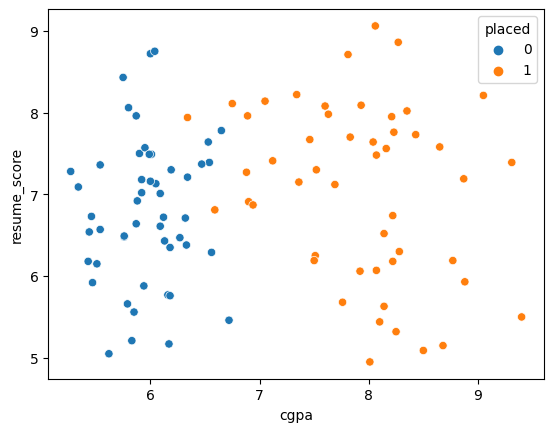

In [5]:
sns.scatterplot(data=df, x="cgpa", y="resume_score", hue="placed")

In [6]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [8]:
from sklearn.linear_model import Perceptron
p = Perceptron()
p.fit(X,y)
p.coef_

array([[ 40.26, -36.  ]])

In [9]:
p.intercept_

array([-25.])

C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<AxesSubplot: >

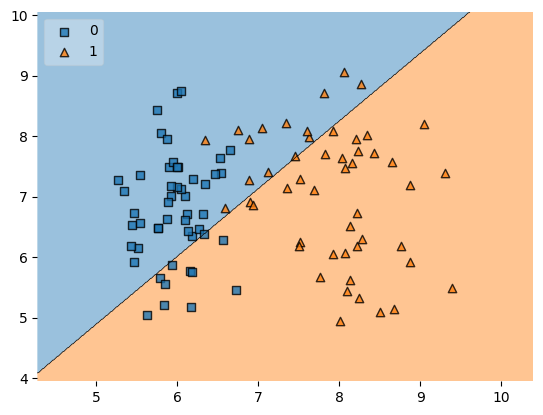

In [12]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, y.values, clf=p, legend=2)

In [ ]:
#Perceptron Trick

In [ ]:
#https://www.desmos.com/calculator

In [13]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

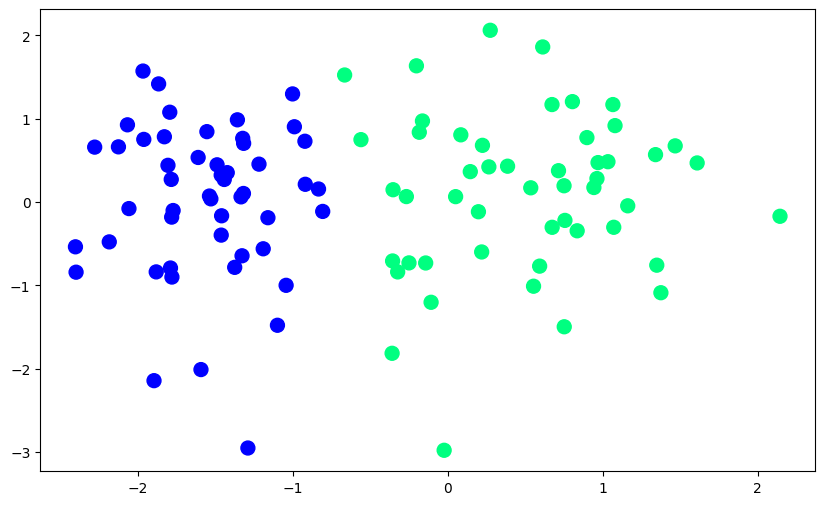

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [15]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [16]:
def step(z):
    return 1 if z>0 else 0

In [17]:
intercept_,coef_ = perceptron(X,y)

In [18]:
print(coef_)
print(intercept_)

[1.40228537 0.1891586 ]
1.0


In [19]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [20]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

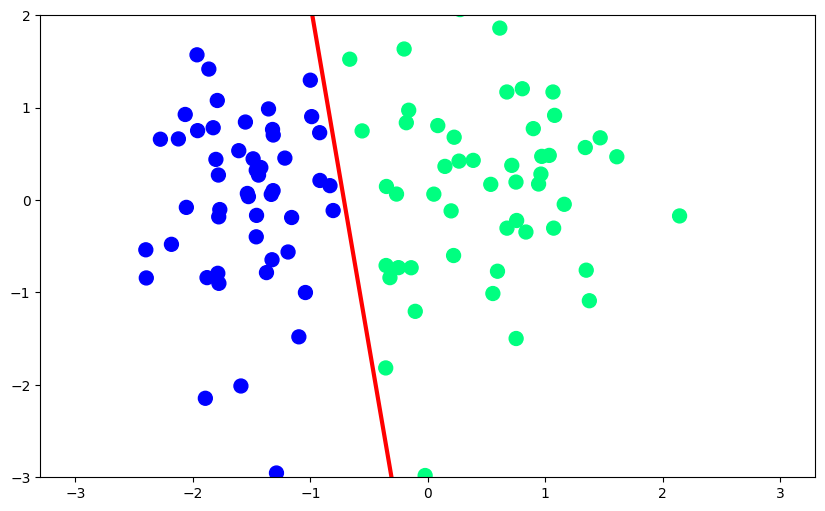

In [21]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [22]:
#Perceptron Loss Function

In [23]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=15)

In [24]:
X.shape

(100, 2)

In [25]:
y.shape

(100,)

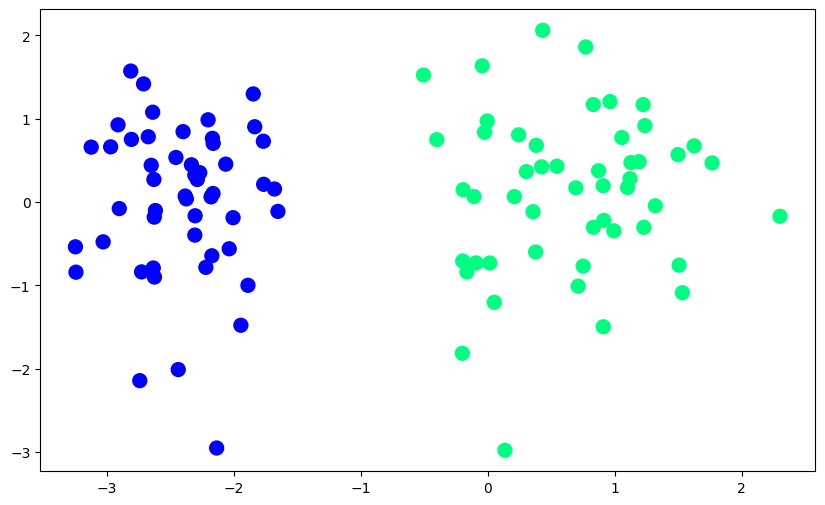

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [27]:
def perceptron(X,y):
    
    w1=w2=b=1
    lr = 0.1
    
    for j in range(1000):
    
        for i in range(X.shape[0]):

            # check condition
            z = w1*X[i][0] + w2*X[i][1] + b

            if z*y[i] < 0:
                w1 = w1 + lr*y[i]*X[i][0]
                w2 = w2 + lr*y[i]*X[i][1]
                b = b + lr*y[i]
            
    return w1,w2,b

In [28]:
w1,w2,b = perceptron(X,y)

In [29]:
b

1.3000000000000003

In [30]:
m = -(w1/w2)
c = -(b/w2)

print(m,c)

-4.531321834268464 -5.851870329508209


(-3.0, 2.0)

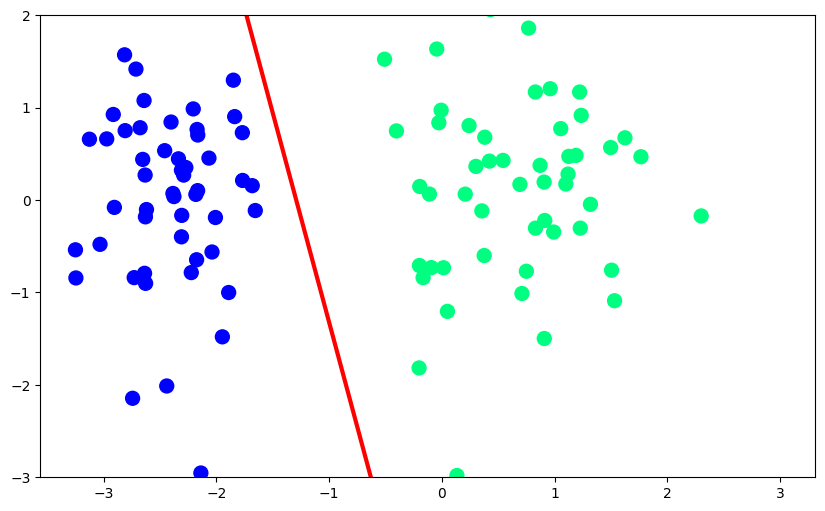

In [31]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [32]:
#loss function
#https://scikit-learn.org/stable/modules/sgd.html

In [34]:
#Problem-with-perceptron

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
or_data = pd.DataFrame()
and_data = pd.DataFrame()
xor_data = pd.DataFrame()

or_data['input1']=[1,1,0,0]
or_data['input2']=[1,0,1,0]
or_data['ouput']=[1,1,1,0]

and_data['input1']=[1,1,0,0]
and_data['input2']=[1,0,1,0]
and_data['ouput']=[1,0,0,0]

xor_data['input1']=[1,1,0,0]
xor_data['input2']=[1,0,1,0]
xor_data['ouput']=[0,1,1,0]

In [37]:
and_data

input1  input2  ouput
0       1       1      1
1       1       0      0
2       0       1      0
3       0       0      0

<AxesSubplot: xlabel='input1', ylabel='input2'>

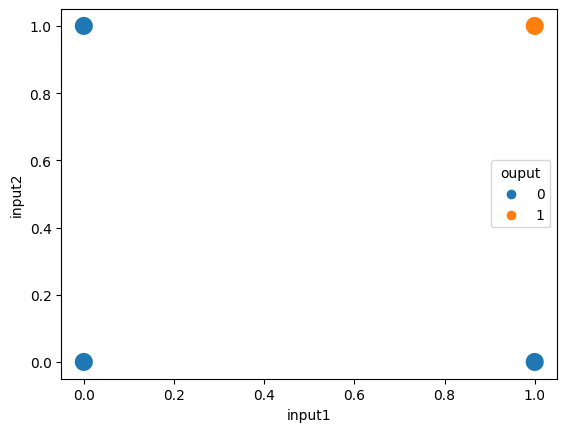

In [39]:
sns.scatterplot(data=and_data, x="input1", y="input2", hue="ouput",s=200)

In [40]:
or_data

input1  input2  ouput
0       1       1      1
1       1       0      1
2       0       1      1
3       0       0      0

<AxesSubplot: xlabel='input1', ylabel='input2'>

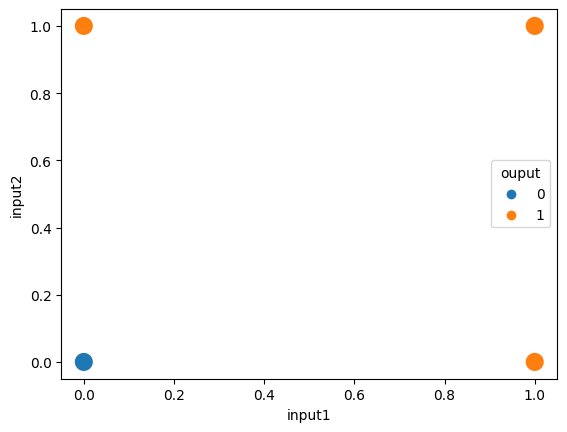

In [41]:
sns.scatterplot(data=or_data, x="input1", y="input2", hue="ouput",s=200)

In [42]:
xor_data

input1  input2  ouput
0       1       1      0
1       1       0      1
2       0       1      1
3       0       0      0

<AxesSubplot: xlabel='input1', ylabel='input2'>

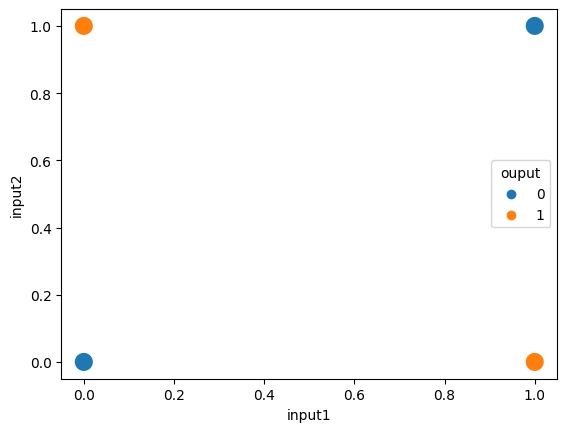

In [43]:
sns.scatterplot(data=xor_data, x="input1", y="input2", hue="ouput",s=200)

In [44]:
from sklearn.linear_model import Perceptron
clf1=Perceptron()
clf2=Perceptron()
clf3=Perceptron()

In [45]:
clf1.fit(and_data.iloc[:,0:2].values,and_data.iloc[:,-1].values)
clf2.fit(or_data.iloc[:,0:2].values,or_data.iloc[:,-1].values)
clf3.fit(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values)

Perceptron()

In [46]:
clf1.coef_

array([[2., 2.]])

In [47]:
clf1.intercept_

array([-2.])

In [48]:
x=np.linspace(-1,1,5)
y=-x+1

<AxesSubplot: xlabel='input1', ylabel='input2'>

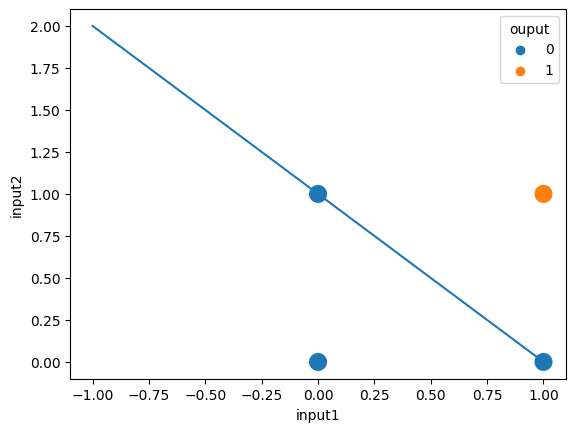

In [49]:
plt.plot(x,y)
sns.scatterplot(data=and_data, x="input1", y="input2", hue="ouput",s=200)

In [50]:
clf2.coef_

array([[2., 2.]])

In [51]:
clf2.intercept_

array([-1.])

In [52]:
x1=np.linspace(-1,1,5)
y1=-x+0.5

<AxesSubplot: xlabel='input1', ylabel='input2'>

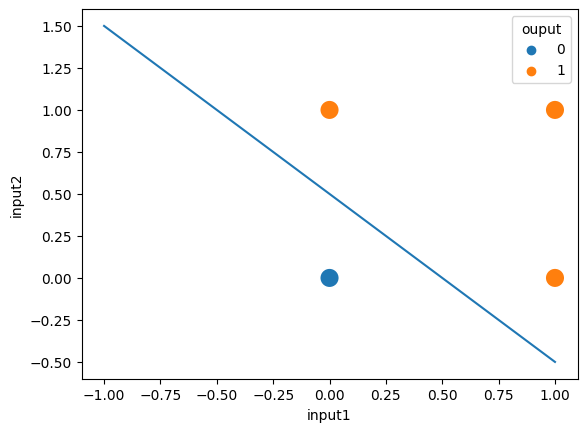

In [53]:
plt.plot(x1,y1)
sns.scatterplot(data=or_data, x="input1", y="input2", hue="ouput",s=200)

In [54]:
clf3.coef_

array([[0., 0.]])

In [55]:
clf3.intercept_

array([0.])

C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot: >

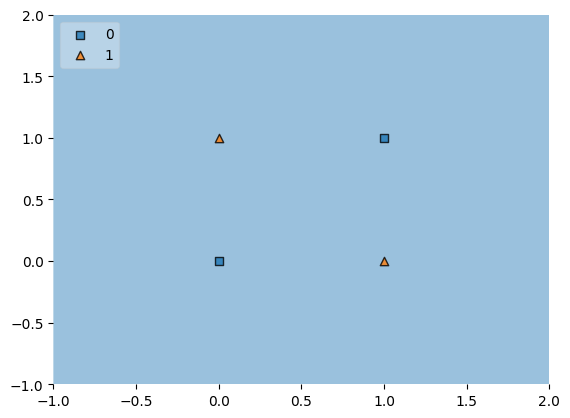

In [56]:
plot_decision_regions(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values, clf=clf3, legend=2)

## MLP

In [1]:
#https://playground.tensorflow.org/

In [ ]:
#Customer Churn Prediction using ANN
#https://www.kaggle.com/code/campusx/notebook8ad570467f/notebook

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [8]:
df = pd.read_csv('Churn_Modelling.csv')
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [9]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [12]:
df.head(2)

CreditScore  Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0          619   42       2      0.00              1          1   
1          608   41       1  83807.86              1          0   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1                  0   
1               1        112542.58       0                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0

In [16]:
df.shape

(10000, 12)

In [13]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [15]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [44]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 7)                 84        
                                                                 
 dense_8 (Dense)             (None, 1)                 8         
                                                                 
Total params: 224
Trainable params: 224
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 3ms/step - loss: 3280.0645 - accuracy: 0.3494 - val_loss: 79.4039 - val_accuracy: 0.7519
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 37.8500 - accuracy: 0.5986 - val_loss: 18.3821 - val_accuracy: 0.6900
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 11.6073 - accuracy: 0.6627 - val_loss: 6.3569 - val_accuracy: 0.6744
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 4.1243 - accuracy: 0.6520 - val_loss: 2.9963 - val_accuracy: 0.6106
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 2.6750 - accuracy: 0.6441 - val_loss: 1.9011 - val_accuracy: 0.6825
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 2.0514 - accuracy: 0.6434 - val_loss: 2.5547 - val_accuracy: 0.7412
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 1.7895 - accuracy: 0.6380 - val_loss: 1.8875 - val_accuracy:

Epoch 58/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5511 - accuracy: 0.7852 - val_loss: 0.5083 - val_accuracy: 0.7969
Epoch 59/100
128/128 [==============================] - 0s 2ms/step - loss: 0.6056 - accuracy: 0.7648 - val_loss: 0.5120 - val_accuracy: 0.7969
Epoch 60/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5373 - accuracy: 0.7894 - val_loss: 0.5084 - val_accuracy: 0.7969
Epoch 61/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5216 - accuracy: 0.7933 - val_loss: 0.5358 - val_accuracy: 0.7969
Epoch 62/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5290 - accuracy: 0.7897 - val_loss: 0.5407 - val_accuracy: 0.7969
Epoch 63/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5202 - accuracy: 0.7919 - val_loss: 0.5128 - val_accuracy: 0.7969
Epoch 64/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5152 - accuracy: 0.7937 - val_loss: 0.5153 - val_accuracy:

In [48]:
#Layer 0 Weights and Bias
model.layers[0].get_weights()

[array([[ 0.15594101, -0.267459  ,  0.4795592 , -0.25367805,  0.05153007,
          0.18329087,  0.52356625, -0.20520191,  0.0700866 ,  0.43235773,
         -0.4804143 ],
        [ 0.19880025,  0.12217784, -0.12843956,  0.22321793,  0.2601357 ,
          0.21886697,  0.47009856, -0.00479744, -0.3819471 ,  0.21506998,
         -0.5901865 ],
        [-0.35299847, -0.08887476,  0.07673026,  0.09480254,  0.56255555,
         -0.0163534 , -0.2653128 ,  0.05300806,  0.23270041,  0.02771275,
          0.30173132],
        [ 0.10179237, -0.257454  ,  0.17379111,  0.02465801,  0.26288024,
         -0.02603427, -0.34687313,  0.36450052, -0.33071446,  0.25854468,
          0.31606755],
        [ 0.04153674,  0.01895267,  0.19535807,  0.47339034,  0.5454374 ,
         -0.39364463, -0.12504105,  0.0846063 , -0.41013557,  0.28267533,
          0.22235584],
        [-0.6079584 ,  0.25204307, -0.46113557,  0.5368674 ,  0.7859868 ,
          0.10109427,  0.14011464, -0.24178545,  0.48490053,  0.5286238

In [49]:
#Layer 1 Weights and Bias
model.layers[1].get_weights()

[array([[-0.5729169 ,  0.4791288 ,  0.2023974 , -0.57373005, -0.27694055,
         -0.60541964,  0.469418  ],
        [-0.28706118,  0.5076325 , -0.3225904 , -0.19702089,  0.30795318,
         -0.35637206, -0.21946391],
        [ 0.1473754 ,  0.2297737 ,  0.19749537, -0.35959733, -0.26885647,
          0.30624485, -0.21295638],
        [ 0.11144185, -0.6354524 , -0.71481735,  0.56051695, -0.31698397,
          0.24011578, -0.170503  ],
        [-0.36796737, -0.2669694 , -0.07849413,  0.07767316,  0.31448358,
         -0.44019735, -0.17024298],
        [ 0.5693593 ,  0.23923887,  0.37825   ,  0.14356263, -0.08394995,
          0.05020335, -0.58765334],
        [-0.49303335, -0.5887374 , -0.18193172, -0.4560658 ,  0.08262033,
          0.40734267, -0.39909837],
        [-0.43410096, -0.2894382 ,  0.4453142 ,  0.28052863,  0.3174934 ,
          0.30192256, -0.49211144],
        [-0.0574649 , -0.06805533, -0.08128306,  0.10353601, -0.34981284,
         -0.5478003 ,  0.3441481 ],
        [ 

In [50]:
#Layer 2 Weights and Bias
model.layers[2].get_weights()

[array([[ 8.3981961e-01],
        [ 2.9200089e-01],
        [ 3.1386109e-04],
        [ 3.9962402e-01],
        [-5.9595262e-04],
        [-6.8575996e-01],
        [-4.9460882e-01]], dtype=float32),
 array([-1.2574407], dtype=float32)]

In [51]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [52]:
y_pred

array([[0.22141477],
       [0.22141477],
       [0.22141477],
       ...,
       [0.22141477],
       [0.22141477],
       [0.22141477]], dtype=float32)

In [53]:
y_pred = y_pred.argmax(axis=-1)

In [54]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

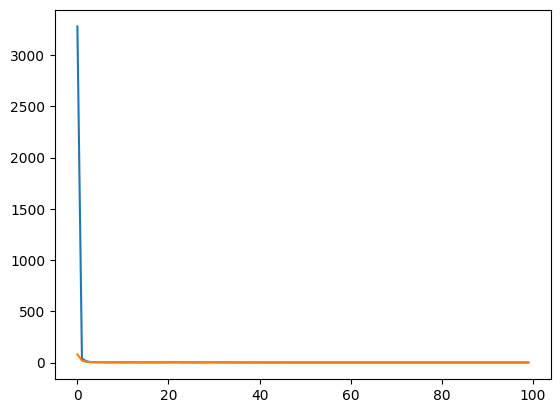

In [56]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

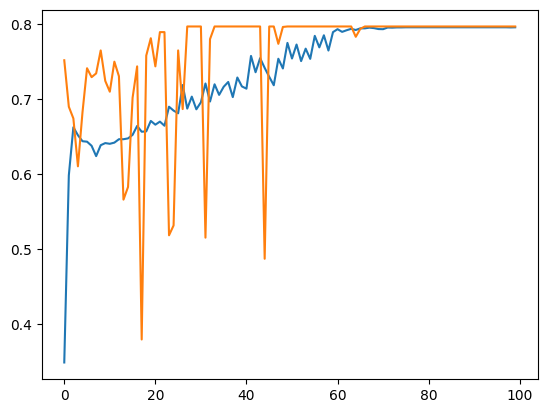

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [58]:
#mnist-classification

In [59]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [60]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [61]:
X_test.shape

(10000, 28, 28)

In [62]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

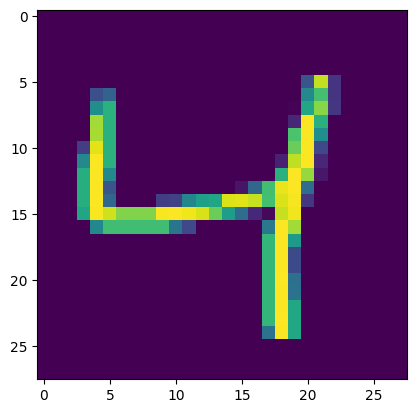

In [63]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [64]:
X_train = X_train/255
X_test = X_test/255

In [65]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [66]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [67]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 32)                4128      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [69]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2768 - accuracy: 0.9206 - val_loss: 0.1401 - val_accuracy: 0.9603
Epoch 2/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1175 - accuracy: 0.9651 - val_loss: 0.1098 - val_accuracy: 0.9674
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0827 - accuracy: 0.9743 - val_loss: 0.1203 - val_accuracy: 0.9642
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0625 - accuracy: 0.9807 - val_loss: 0.0936 - val_accuracy: 0.9718
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0458 - accuracy: 0.9858 - val_loss: 0.0955 - val_accuracy: 0.9732
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0393 - accuracy: 0.9870 - val_loss: 0.1046 - val_accuracy: 0.9736
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0328 - accuracy: 0.9894 - val_loss: 0.1005 - val_accuracy:

In [70]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [71]:
y_pred = y_prob.argmax(axis=1)

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9751

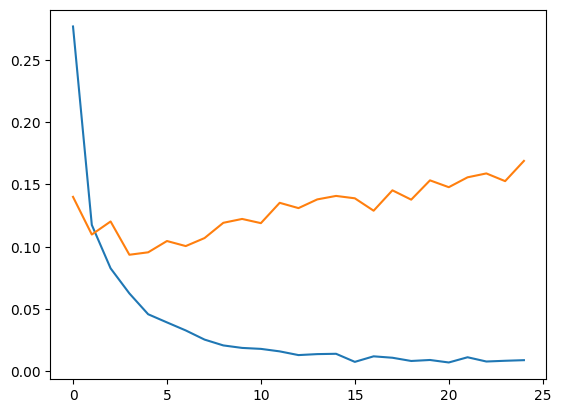

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

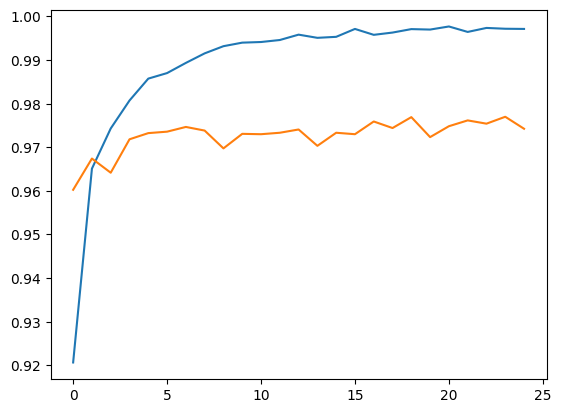

In [74]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

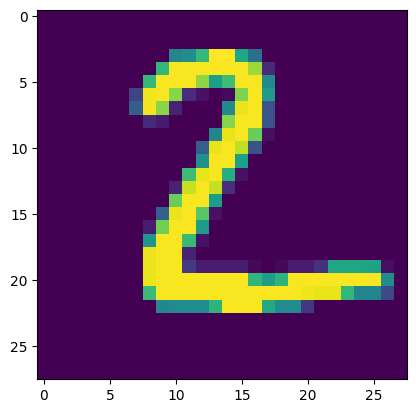

In [75]:
plt.imshow(X_test[1])

In [77]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 22ms/step


array([2], dtype=int64)

In [78]:
#gre-admission-prediction

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
# Import Dataset
data = pd.read_csv("Admission_Predict_2.csv")
data.shape

(500, 9)

In [81]:
data.head(2)

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76

In [82]:
data.columns.values

array(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating',
       'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype=object)

In [83]:
data.drop('Serial No.', axis=1, inplace=True)

In [84]:
data.rename({'Chance of Admit ': 'Chance of Admit', 'LOR ':'LOR'}, axis=1, inplace=True)

In [85]:
# Let's see the detail information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [86]:
## General statistics of the data
data.describe()

GRE Score  TOEFL Score  University Rating         SOP        LOR  \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance of Admit  
count  500.000000  500.000000        500.00000  
mean     8.576440    0.560000          0.72174  
std      0.604813    0.496884          0.14114  
min      6.800000    0.000000          0.34000  
25%      8.127500    0.000000          0.63000  
50%      8.560000    1.000000          0.72000  
75%      9.040000    1.000000          0.82000  
max      9.920000    1.000000          0.97000

In [88]:
#Duplicate Rows
data.duplicated().sum()

0

Text(0.5, 1.0, 'Correlation Factors Heat Map')

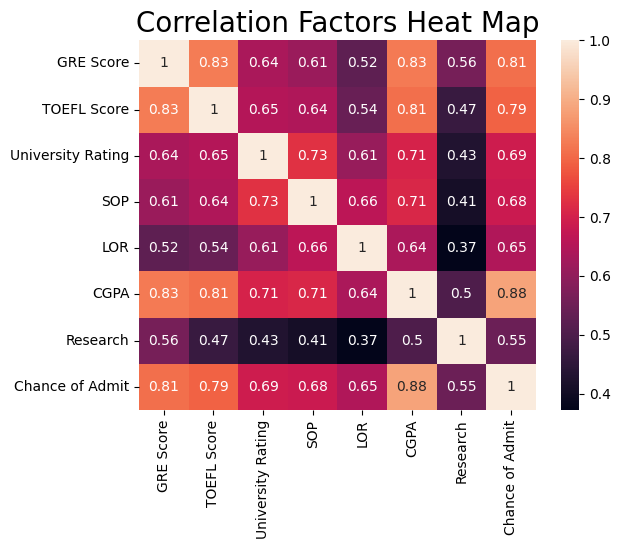

In [89]:
## Correlation coeffecients heatmap
sns.heatmap(data.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='20')

In [90]:
data.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0        337          118                  4  4.5  4.5  9.65         1   
1        324          107                  4  4.0  4.5  8.87         1   
2        316          104                  3  3.0  3.5  8.00         1   
3        322          110                  3  3.5  2.5  8.67         1   
4        314          103                  2  2.0  3.0  8.21         0   

   Chance of Admit  
0             0.92  
1             0.76  
2             0.72  
3             0.80  
4             0.65

In [93]:
X=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [96]:
X

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
0          337          118                  4  4.5  4.5  9.65         1
1          324          107                  4  4.0  4.5  8.87         1
2          316          104                  3  3.0  3.5  8.00         1
3          322          110                  3  3.5  2.5  8.67         1
4          314          103                  2  2.0  3.0  8.21         0
..         ...          ...                ...  ...  ...   ...       ...
495        332          108                  5  4.5  4.0  9.02         1
496        337          117                  5  5.0  5.0  9.87         1
497        330          120                  5  4.5  5.0  9.56         1
498        312          103                  4  4.0  5.0  8.43         0
499        327          113                  4  4.5  4.5  9.04         0

[500 rows x 7 columns]

In [94]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [98]:
from sklearn.preprocessing  import  MinMaxScaler
scaler=MinMaxScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)

In [99]:
X_train

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
238        310          104                  3  2.0  3.5  8.37         0
438        318          110                  1  2.5  3.5  8.54         1
475        300          101                  3  3.5  2.5  7.88         0
58         300           99                  1  3.0  2.0  6.80         1
380        322          104                  3  3.5  4.0  8.84         1
..         ...          ...                ...  ...  ...   ...       ...
255        307          110                  4  4.0  4.5  8.37         0
72         321          111                  5  5.0  5.0  9.45         1
396        325          107                  3  3.0  3.5  9.11         1
235        326          111                  5  4.5  4.0  9.23         1
37         300          105                  1  1.0  2.0  7.80         0

[400 rows x 7 columns]

In [100]:
X_train_scale

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [101]:
from tensorflow import keras 
import tensorflow as tf  
from tensorflow.keras.layers import Dense
from keras import Sequential

In [102]:
model=Sequential()
model.add(Dense(7,activation ='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 7)                 56        
                                                                 
 dense_13 (Dense)            (None, 7)                 56        
                                                                 
 dense_14 (Dense)            (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [116]:
model.compile(loss='mean_squared_error',optimizer='Adam')


In [110]:
history= model.fit(X_train_scale,y_train,validation_split=0.2,epochs=25)

Epoch 1/25


C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


10/10 [==============================] - 1s 16ms/step - loss: 0.0132 - accuracy: 0.0000e+00 - val_loss: 0.0137 - val_accuracy: 0.0000e+00
Epoch 2/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0116 - accuracy: 0.0000e+00 - val_loss: 0.0123 - val_accuracy: 0.0000e+00
Epoch 3/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0103 - accuracy: 0.0000e+00 - val_loss: 0.0106 - val_accuracy: 0.0000e+00
Epoch 4/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0093 - accuracy: 0.0000e+00 - val_loss: 0.0095 - val_accuracy: 0.0000e+00
Epoch 5/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0086 - accuracy: 0.0000e+00 - val_loss: 0.0088 - val_accuracy: 0.0000e+00
Epoch 6/25
10/10 [==============================] - 0s 7ms/step - loss: 0.0078 - accuracy: 0.0000e+00 - val_loss: 0.0079 - val_accuracy: 0.0000e+00
Epoch 7/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0074 - accuracy: 0.0000e+00 - val_loss: 0.0074 -

In [111]:
y_pred=model.predict(X_test_scale)

4/4 [==============================] - 0s 6ms/step


In [112]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)


0.7468842672056704

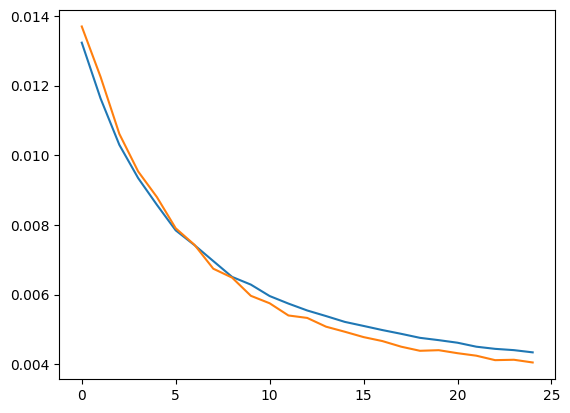

In [113]:
import matplotlib.pyplot as plt  
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

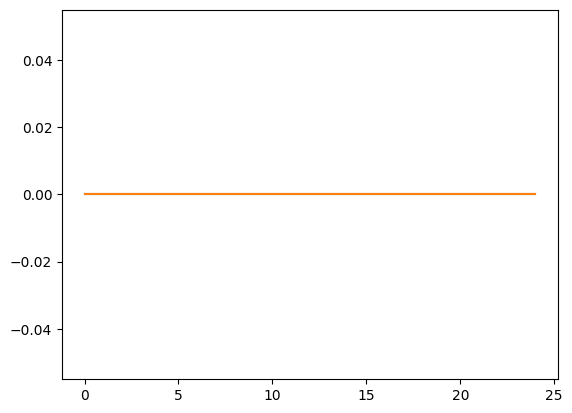

In [115]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [23]:
#Weights

In [3]:
#zero-initialization-relu

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('ushape.csv')

In [8]:
df.head()

X       Y  class
0  0.0316  0.9870    0.0
1  2.1200 -0.0462    1.0
2  0.8820 -0.0758    0.0
3 -0.0551 -0.0373    1.0
4  0.8300 -0.5390    1.0

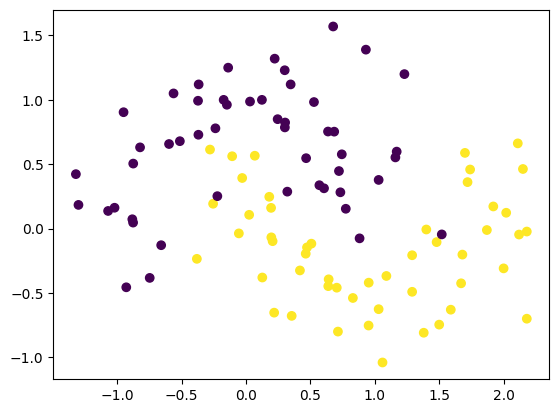

In [9]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [10]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [11]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [12]:
model = Sequential()

model.add(Dense(2,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Set parameters to 0
model.get_weights()

[array([[-0.32039446, -1.12743   ],
        [-0.3543753 ,  0.8636497 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.3084097 ],
        [0.58647215]], dtype=float32),
 array([0.], dtype=float32)]

In [14]:
initial_weights = model.get_weights()

In [15]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [16]:
model.set_weights(initial_weights)

In [17]:
model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 100ms/step - loss: 0.8635 - accuracy: 0.5000 - val_loss: 0.8362 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 19ms/step - loss: 0.8612 - accuracy: 0.5000 - val_loss: 0.8340 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 20ms/step - loss: 0.8591 - accuracy: 0.5000 - val_loss: 0.8319 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 18ms/step - loss: 0.8569 - accuracy: 0.5000 - val_loss: 0.8299 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 0.8548 - accuracy: 0.5000 - val_loss: 0.8278 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 18ms/step - loss: 0.8526 - accuracy: 0.5000 - val_loss: 0.8258 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 0.8505 - accuracy: 0.5000 - val_loss: 0.8238 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

In [20]:
model.get_weights()

[array([[0.7107568 , 0.7107568 ],
        [0.24414776, 0.24414776]], dtype=float32),
 array([0.27353287, 0.27353287], dtype=float32),
 array([[0.2657099],
        [0.2657099]], dtype=float32),
 array([0.25154734], dtype=float32)]

9600/9600 [==============================] - 9s 920us/step


C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot: >

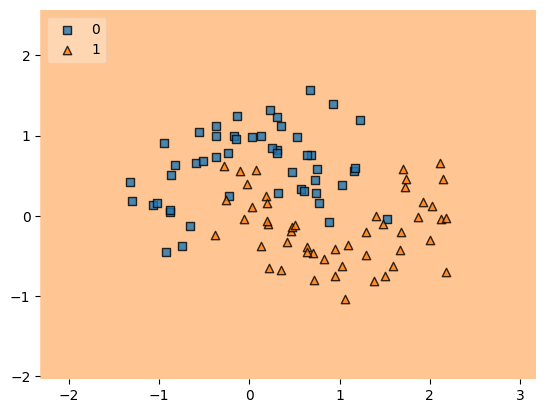

In [21]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [22]:
#zero-initialization-sigmoid

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ushape.csv')

df.head()

X       Y  class
0  0.0316  0.9870    0.0
1  2.1200 -0.0462    1.0
2  0.8820 -0.0758    0.0
3 -0.0551 -0.0373    1.0
4  0.8300 -0.5390    1.0

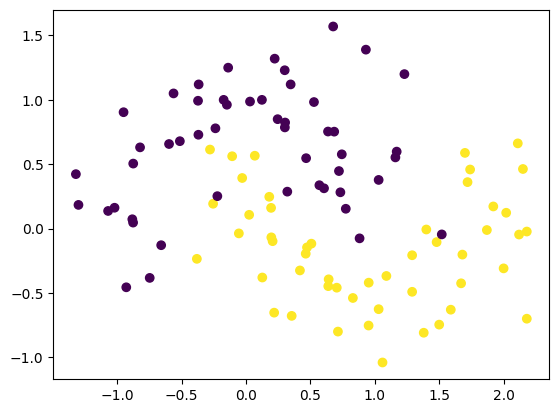

In [25]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [26]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [27]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [28]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                30        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Set parameters to 0
model.get_weights()

[array([[ 0.6270824 , -0.00863671,  0.12423658, -0.09499443, -0.26389202,
         -0.27444425,  0.34702986, -0.28709623,  0.3320976 , -0.35116518],
        [ 0.3918367 , -0.5093613 , -0.68100727,  0.18158734, -0.13438153,
         -0.6121179 , -0.3799095 , -0.10056055, -0.4599364 , -0.01152092]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.5835191 ],
        [ 0.492019  ],
        [-0.67879367],
        [-0.53978556],
        [-0.3740724 ],
        [-0.52609766],
        [ 0.32045835],
        [ 0.19080281],
        [ 0.57157797],
        [-0.11271966]], dtype=float32),
 array([0.], dtype=float32)]

In [30]:
initial_weights = model.get_weights()

initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

model.set_weights(initial_weights)

In [31]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [32]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 80ms/step - loss: 0.6933 - accuracy: 0.4500 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 20ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 21ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/100
3/3 [===

In [34]:
model.get_weights()

[array([[-0.43113095, -0.43113095, -0.43113095, -0.43113095, -0.43113095,
         -0.43113095, -0.43113095, -0.43113095, -0.43113095, -0.43113095],
        [ 0.44273868,  0.44273868,  0.44273868,  0.44273868,  0.44273868,
          0.44273868,  0.44273868,  0.44273868,  0.44273868,  0.44273868]],
       dtype=float32),
 array([-0.10314783, -0.10314783, -0.10314783, -0.10314783, -0.10314783,
        -0.10314783, -0.10314783, -0.10314783, -0.10314783, -0.10314783],
       dtype=float32),
 array([[-0.04971574],
        [-0.04971574],
        [-0.04971574],
        [-0.04971574],
        [-0.04971574],
        [-0.04971574],
        [-0.04971574],
        [-0.04971574],
        [-0.04971574],
        [-0.04971574]], dtype=float32),
 array([0.05429532], dtype=float32)]

9600/9600 [==============================] - 10s 1ms/step


<AxesSubplot: >

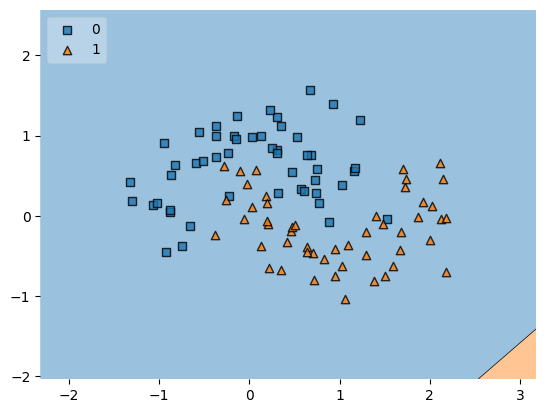

In [35]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [36]:
#He Init:

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('ushape.csv')
df.head()

X       Y  class
0  0.0316  0.9870    0.0
1  2.1200 -0.0462    1.0
2  0.8820 -0.0758    0.0
3 -0.0551 -0.0373    1.0
4  0.8300 -0.5390    1.0

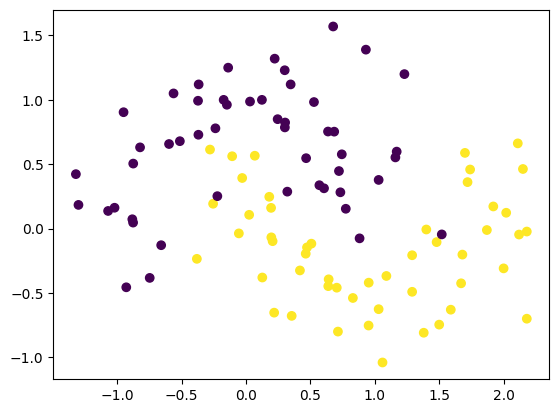

In [40]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [41]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [42]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [43]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                30        
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.get_weights()

[array([[ 1.0250663 ,  1.4192011 ,  0.16305488,  0.386267  ,  0.9089729 ,
         -0.5877989 , -1.3657732 ,  1.0960991 ,  0.271646  , -0.93017125],
        [ 0.17315446,  0.6323354 , -1.5701158 ,  0.12021684, -2.0884893 ,
          2.103374  ,  1.9329149 ,  0.14629567,  0.21539201, -0.95515436]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.44643876, -0.20842531, -0.19482338, -0.573846  , -0.9486385 ,
          0.6725382 ,  0.19245037,  0.3753938 , -0.28596196,  0.32452974],
        [-0.4787503 ,  0.10482667,  0.5338011 , -0.7594086 , -0.07689314,
          0.8696001 ,  0.2859186 , -0.2918782 , -0.8561297 , -0.19890106],
        [ 0.49307433,  0.17509077, -0.08333677, -0.23432073, -0.05899798,
         -0.2070387 ,  0.21965876, -0.17636557,  0.09736585, -0.24152637],
        [-0.05587902,  0.16101518, -0.12046561,  0.42800674,  0.16570662,
          0.2709845 , -0.43354806, -0.3846212 , -0.47987238,  0.40237373],
        [ 0.46578

In [45]:
initial_weights = model.get_weights()

In [46]:
model.set_weights(initial_weights)

In [47]:
model.get_weights()

[array([[ 1.0250663 ,  1.4192011 ,  0.16305488,  0.386267  ,  0.9089729 ,
         -0.5877989 , -1.3657732 ,  1.0960991 ,  0.271646  , -0.93017125],
        [ 0.17315446,  0.6323354 , -1.5701158 ,  0.12021684, -2.0884893 ,
          2.103374  ,  1.9329149 ,  0.14629567,  0.21539201, -0.95515436]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.44643876, -0.20842531, -0.19482338, -0.573846  , -0.9486385 ,
          0.6725382 ,  0.19245037,  0.3753938 , -0.28596196,  0.32452974],
        [-0.4787503 ,  0.10482667,  0.5338011 , -0.7594086 , -0.07689314,
          0.8696001 ,  0.2859186 , -0.2918782 , -0.8561297 , -0.19890106],
        [ 0.49307433,  0.17509077, -0.08333677, -0.23432073, -0.05899798,
         -0.2070387 ,  0.21965876, -0.17636557,  0.09736585, -0.24152637],
        [-0.05587902,  0.16101518, -0.12046561,  0.42800674,  0.16570662,
          0.2709845 , -0.43354806, -0.3846212 , -0.47987238,  0.40237373],
        [ 0.46578

In [48]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [49]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 100ms/step - loss: 1.2292 - accuracy: 0.4875 - val_loss: 1.0974 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 21ms/step - loss: 1.1661 - accuracy: 0.4875 - val_loss: 1.0505 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 1.1052 - accuracy: 0.4875 - val_loss: 1.0085 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 38ms/step - loss: 1.0481 - accuracy: 0.4750 - val_loss: 0.9709 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 17ms/step - loss: 1.0033 - accuracy: 0.4750 - val_loss: 0.9369 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 0.9573 - accuracy: 0.4750 - val_loss: 0.9088 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 0.9178 - accuracy: 0.4750 - val_loss: 0.8867 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

In [50]:
model.get_weights()

[array([[ 0.98047435,  1.3228608 ,  0.19510756,  0.3064642 ,  1.1572434 ,
         -0.6970368 , -1.3934898 ,  1.1925181 ,  0.21905224, -1.086938  ],
        [ 0.0208745 ,  0.66728354, -1.6348573 ,  0.2977328 , -2.1901574 ,
          2.0341902 ,  1.7746736 ,  0.05391324,  0.30845898, -0.9331148 ]],
       dtype=float32),
 array([-0.12738982, -0.04599493,  0.07863858,  0.12927325,  0.18296432,
        -0.08159602, -0.18230622, -0.02405444,  0.11521862,  0.08332638],
       dtype=float32),
 array([[-2.78479517e-01, -1.70748591e-01, -1.71843261e-01,
         -5.73845983e-01, -7.86374807e-01,  6.39768422e-01,
          2.43243501e-01,  4.26488787e-01, -3.14744055e-01,
          3.59568030e-01],
        [-3.80000234e-01,  1.08686484e-01,  5.36112666e-01,
         -7.83180416e-01,  1.07414939e-01,  8.26457798e-01,
          2.83099413e-01, -3.03075016e-01, -9.78354573e-01,
         -1.31105632e-01],
        [ 5.98521173e-01,  3.37884486e-01,  1.07051566e-01,
         -1.90906540e-01, -1.32069

9600/9600 [==============================] - 10s 1ms/step


<AxesSubplot: >

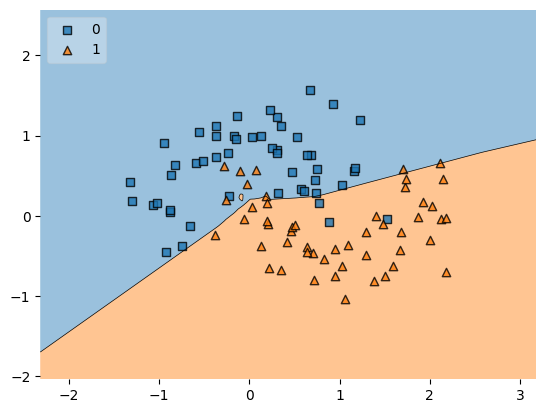

In [51]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [52]:
(np.random.randn(10,10)*0.01).min()

-0.025760627465171184

In [53]:
(np.random.randn(10,10)*0.01).max()

0.02179217395482584

In [55]:
#Batch-vs-stochastic-GD

In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [3]:
df = df[['Age','EstimatedSalary','Purchased']]
df.head()

Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

In [4]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [6]:
X_scaled.shape

(400, 2)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
X_train.shape

(320, 2)

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [10]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=500,batch_size=1,validation_split=0.2)
#print(time.time() - start)

Epoch 1/500
320/320 [==============================] - 1s 2ms/step - loss: 0.5428 - accuracy: 0.8188 - val_loss: 0.4930 - val_accuracy: 0.9500
Epoch 2/500
320/320 [==============================] - 1s 2ms/step - loss: 0.3713 - accuracy: 0.8656 - val_loss: 0.3686 - val_accuracy: 0.9375
Epoch 3/500
320/320 [==============================] - 1s 2ms/step - loss: 0.3117 - accuracy: 0.8625 - val_loss: 0.3229 - val_accuracy: 0.9125
Epoch 4/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2925 - accuracy: 0.8719 - val_loss: 0.2912 - val_accuracy: 0.9125
Epoch 5/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2848 - accuracy: 0.8625 - val_loss: 0.2672 - val_accuracy: 0.9250
Epoch 6/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2796 - accuracy: 0.8656 - val_loss: 0.2499 - val_accuracy: 0.9250
Epoch 7/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2794 - accuracy: 0.8750 - val_loss: 0.2360 - val_accuracy: 0.9375

Epoch 58/500
320/320 [==============================] - 0s 2ms/step - loss: 0.2662 - accuracy: 0.9094 - val_loss: 0.1590 - val_accuracy: 0.9625
Epoch 59/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2648 - accuracy: 0.9062 - val_loss: 0.1585 - val_accuracy: 0.9500
Epoch 60/500
320/320 [==============================] - 0s 2ms/step - loss: 0.2623 - accuracy: 0.9062 - val_loss: 0.1522 - val_accuracy: 0.9625
Epoch 61/500
320/320 [==============================] - 0s 2ms/step - loss: 0.2739 - accuracy: 0.9094 - val_loss: 0.1525 - val_accuracy: 0.9750
Epoch 62/500
320/320 [==============================] - 0s 2ms/step - loss: 0.2736 - accuracy: 0.9094 - val_loss: 0.1529 - val_accuracy: 0.9625
Epoch 63/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2793 - accuracy: 0.9094 - val_loss: 0.1531 - val_accuracy: 0.9625
Epoch 64/500
320/320 [==============================] - 0s 2ms/step - loss: 0.2646 - accuracy: 0.9094 - val_loss: 0.1417 - val_accuracy:

Epoch 115/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2709 - accuracy: 0.9125 - val_loss: 0.1774 - val_accuracy: 0.9125
Epoch 116/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2696 - accuracy: 0.9094 - val_loss: 0.1754 - val_accuracy: 0.9250
Epoch 117/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2675 - accuracy: 0.9125 - val_loss: 0.1974 - val_accuracy: 0.9125
Epoch 118/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2654 - accuracy: 0.9125 - val_loss: 0.1749 - val_accuracy: 0.9125
Epoch 119/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2635 - accuracy: 0.9094 - val_loss: 0.1906 - val_accuracy: 0.9125
Epoch 120/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2619 - accuracy: 0.9125 - val_loss: 0.1798 - val_accuracy: 0.9125
Epoch 121/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2624 - accuracy: 0.9094 - val_loss: 0.1894 - val_ac

320/320 [==============================] - 1s 2ms/step - loss: 0.2598 - accuracy: 0.9125 - val_loss: 0.2042 - val_accuracy: 0.9375
Epoch 228/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2522 - accuracy: 0.9187 - val_loss: 0.2059 - val_accuracy: 0.9375
Epoch 229/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2551 - accuracy: 0.9187 - val_loss: 0.1812 - val_accuracy: 0.9375
Epoch 230/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2568 - accuracy: 0.9125 - val_loss: 0.1858 - val_accuracy: 0.9375
Epoch 231/500
320/320 [==============================] - 0s 2ms/step - loss: 0.2558 - accuracy: 0.9094 - val_loss: 0.1952 - val_accuracy: 0.9375
Epoch 232/500
320/320 [==============================] - 0s 2ms/step - loss: 0.2605 - accuracy: 0.9156 - val_loss: 0.2081 - val_accuracy: 0.9375
Epoch 233/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2600 - accuracy: 0.9156 - val_loss: 0.2366 - val_accuracy: 0.9000

320/320 [==============================] - 0s 2ms/step - loss: 0.2590 - accuracy: 0.9156 - val_loss: 0.2382 - val_accuracy: 0.9125
Epoch 340/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2607 - accuracy: 0.9219 - val_loss: 0.2273 - val_accuracy: 0.9125
Epoch 341/500
320/320 [==============================] - 0s 2ms/step - loss: 0.2491 - accuracy: 0.9094 - val_loss: 0.2369 - val_accuracy: 0.9000
Epoch 342/500
320/320 [==============================] - 0s 2ms/step - loss: 0.2529 - accuracy: 0.9156 - val_loss: 0.2343 - val_accuracy: 0.9125
Epoch 343/500
320/320 [==============================] - 0s 2ms/step - loss: 0.2577 - accuracy: 0.9125 - val_loss: 0.2274 - val_accuracy: 0.9125
Epoch 344/500
320/320 [==============================] - 0s 2ms/step - loss: 0.2450 - accuracy: 0.9250 - val_loss: 0.2051 - val_accuracy: 0.9375
Epoch 345/500
320/320 [==============================] - 0s 2ms/step - loss: 0.2601 - accuracy: 0.9156 - val_loss: 0.2417 - val_accuracy: 0.9000

320/320 [==============================] - 0s 2ms/step - loss: 0.2650 - accuracy: 0.9156 - val_loss: 0.2444 - val_accuracy: 0.8875
Epoch 452/500
320/320 [==============================] - 0s 2ms/step - loss: 0.2578 - accuracy: 0.9187 - val_loss: 0.2851 - val_accuracy: 0.8625
Epoch 453/500
320/320 [==============================] - 0s 2ms/step - loss: 0.2654 - accuracy: 0.9125 - val_loss: 0.2747 - val_accuracy: 0.8625
Epoch 454/500
320/320 [==============================] - 0s 2ms/step - loss: 0.2677 - accuracy: 0.9125 - val_loss: 0.2699 - val_accuracy: 0.8750
Epoch 455/500
320/320 [==============================] - 0s 2ms/step - loss: 0.2597 - accuracy: 0.9094 - val_loss: 0.2656 - val_accuracy: 0.8750
Epoch 456/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2626 - accuracy: 0.9156 - val_loss: 0.2781 - val_accuracy: 0.8750
Epoch 457/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2724 - accuracy: 0.9187 - val_loss: 0.2955 - val_accuracy: 0.8625

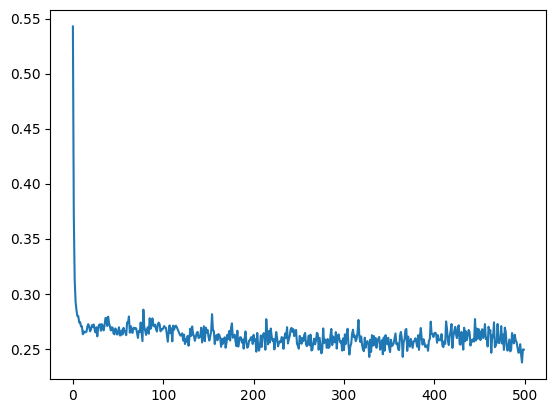

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [13]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=250,validation_split=0.2)
#print(time.time() - start)

Epoch 1/10
2/2 [==============================] - 1s 191ms/step - loss: 0.7237 - accuracy: 0.2875 - val_loss: 0.5691 - val_accuracy: 0.6500
Epoch 2/10
2/2 [==============================] - 0s 30ms/step - loss: 0.7100 - accuracy: 0.2906 - val_loss: 0.5683 - val_accuracy: 0.6625
Epoch 3/10
2/2 [==============================] - 0s 31ms/step - loss: 0.7016 - accuracy: 0.2969 - val_loss: 0.5699 - val_accuracy: 0.6750
Epoch 4/10
2/2 [==============================] - 0s 32ms/step - loss: 0.6948 - accuracy: 0.2969 - val_loss: 0.5695 - val_accuracy: 0.6625
Epoch 5/10
2/2 [==============================] - 0s 31ms/step - loss: 0.6895 - accuracy: 0.3063 - val_loss: 0.5692 - val_accuracy: 0.6750
Epoch 6/10
2/2 [==============================] - 0s 32ms/step - loss: 0.6845 - accuracy: 0.3187 - val_loss: 0.5676 - val_accuracy: 0.7000
Epoch 7/10
2/2 [==============================] - 0s 32ms/step - loss: 0.6800 - accuracy: 0.3313 - val_loss: 0.5697 - val_accuracy: 0.7625
Epoch 8/10
2/2 [==========

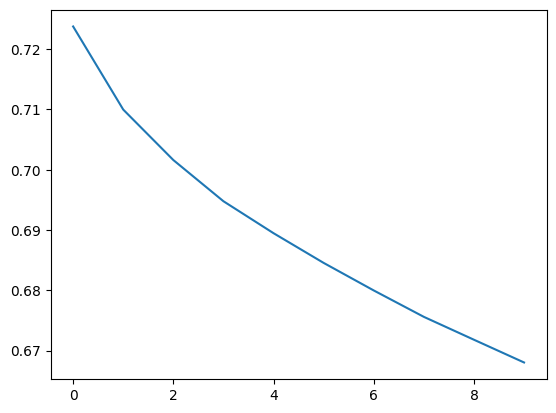

In [15]:
plt.plot(history.history['loss'])

In [16]:
#backpropagation-regression

In [17]:
import numpy as np
import pandas as pd

In [18]:
df = pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7]], columns=['cgpa', 'profile_score', 'lpa'])
df

cgpa  profile_score  lpa
0     8              8    4
1     7              9    5
2     6             10    6
3     5             12    7

In [19]:
def initialize_parameters(layer_dims):
  
  np.random.seed(3)
  parameters = {}
  L = len(layer_dims)         

  for l in range(1, L):

    parameters['W' + str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
      

  return parameters

In [20]:
initialize_parameters([2,2,1])

{'W1': array([[0.1, 0.1],
        [0.1, 0.1]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.1],
        [0.1]]),
 'b2': array([[0.]])}

In [21]:
def linear_forward(A_prev, W, b):
  
  Z = np.dot(W.T, A_prev) + b
  
  return Z

In [22]:
# Forward Prop
def L_layer_forward(X, parameters):

  A = X
  L = len(parameters) // 2                  # number of layers in the neural network
  
  for l in range(1, L+1):
    A_prev = A 
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]
    #print("A"+str(l-1)+": ", A_prev)
    #print("W"+str(l)+": ", Wl)
    #print("b"+str(l)+": ", bl)
    #print("--"*20)

    A = linear_forward(A_prev, Wl, bl)
    #print("A"+str(l)+": ", A)
    #print("**"*20)
          
  return A,A_prev

In [23]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X, parameters)

In [24]:
y_hat = y_hat[0][0]

In [25]:
A1

array([[1.6],
       [1.6]])

In [28]:
def update_parameters(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0])

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0])

In [29]:
update_parameters(parameters,y,y_hat,A1,X)

In [30]:
parameters

{'W1': array([[0.10658137, 0.10658137],
        [0.10658137, 0.10658137]]),
 'b1': array([[0.00082267],
        [0.00082267]]),
 'W2': array([[0.111776],
        [0.111776]]),
 'b2': array([[0.119136]])}

In [31]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.10658137, 0.10658137],
        [0.10658137, 0.10658137]]),
 'b1': array([[0.00082267],
        [0.00082267]]),
 'W2': array([[0.111776],
        [0.111776]]),
 'b2': array([[0.119136]])}

In [32]:
X = df[['cgpa', 'profile_score']].values[1].reshape(2,1) # Shape(no of features, no. of training exaplme)
y = df[['lpa']].values[1][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.11458955, 0.1168776 ],
        [0.11458955, 0.1168776 ]]),
 'b1': array([[0.0019667],
        [0.0019667]]),
 'W2': array([[0.12712927],
        [0.12712927]]),
 'b2': array([[0.13612818]])}

In [33]:
X = df[['cgpa', 'profile_score']].values[2].reshape(2,1) # Shape(no of features, no. of training exaplme)
y = df[['lpa']].values[2][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.12409711, 0.13272353],
        [0.12412266, 0.13276611]]),
 'b1': array([[0.00355129],
        [0.00355555]]),
 'W2': array([[0.14692424],
        [0.14731907]]),
 'b2': array([[0.15810417]])}

In [34]:
X = df[['cgpa', 'profile_score']].values[3].reshape(2,1) # Shape(no of features, no. of training exaplme)
y = df[['lpa']].values[3][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.13482804, 0.15847776],
        [0.1349909 , 0.15884991]]),
 'b1': array([[0.00569748],
        [0.0057292 ]]),
 'W2': array([[0.17312488],
        [0.17534027]]),
 'b2': array([[0.18773702]])}

In [35]:
# epochs implementation

parameters = initialize_parameters([2,2,1])
epochs = 5

for i in range(epochs):

  Loss = []

  for j in range(df.shape[0]):

    X = df[['cgpa', 'profile_score']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = df[['lpa']].values[j][0]

    # Parameter initialization


    y_hat,A1 = L_layer_forward(X,parameters)
    y_hat = y_hat[0][0]

    update_parameters(parameters,y,y_hat,A1,X)

    Loss.append((y-y_hat)**2)

  print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())

parameters

Epoch -  1 Loss -  25.321744156025517
Epoch -  2 Loss -  18.320004165722047
Epoch -  3 Loss -  9.473661050729628
Epoch -  4 Loss -  3.2520938634031613
Epoch -  5 Loss -  1.3407132589299962


{'W1': array([[0.26507636, 0.38558861],
        [0.27800387, 0.40980287]]),
 'b1': array([[0.02749056],
        [0.02974394]]),
 'W2': array([[0.41165744],
        [0.48302736]]),
 'b2': array([[0.48646246]])}

In [36]:
#backpropagation-classification

In [37]:
import numpy as np
import pandas as pd

In [38]:
df = pd.DataFrame([[8,8,1],[7,9,1],[6,10,0],[5,5,0]], columns=['cgpa', 'profile_score', 'placed'])
df

cgpa  profile_score  placed
0     8              8       1
1     7              9       1
2     6             10       0
3     5              5       0

In [39]:
def initialize_parameters(layer_dims):
  
  np.random.seed(3)
  parameters = {}
  L = len(layer_dims)         

  for l in range(1, L):

    parameters['W' + str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
      

  return parameters

In [40]:
# Utility Functions
def sigmoid(Z):
  
  A = 1/(1+np.exp(-Z))

  return A

In [41]:
def linear_forward(A_prev, W, b):
  
  Z = np.dot(W.T, A_prev) + b

  A = sigmoid(Z)
  
  return A

In [42]:
# L-layer feed forward

def L_layer_forward(X, parameters):

  A = X
  L = len(parameters) // 2                  # number of layers in the neural network
  
  for l in range(1, L+1):
    A_prev = A 
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]
    #print("A"+str(l-1)+": ", A_prev)
    #print("W"+str(l)+": ", Wl)
    #print("b"+str(l)+": ", bl)
    #print("--"*20)

    A = linear_forward(A_prev, Wl, bl)
    #print("A"+str(l)+": ", A)
    #print("**"*20)
          
  return A,A_prev

In [43]:
def update_parameters(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.0001 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.0001 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.0001 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0])*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0])*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0]))

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0])*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0])*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0]))

In [44]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['placed']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

print('Loss for this student - ',-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

parameters

Loss for this student -  0.613402628898913


{'W1': array([[0.10000513, 0.10000513],
        [0.10000513, 0.10000513]]),
 'b1': array([[6.41054186e-07],
        [6.41054186e-07]]),
 'W2': array([[0.10003815],
        [0.10003815]]),
 'b2': array([[0.100084]])}

In [45]:
X = df[['cgpa', 'profile_score']].values[1].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['placed']].values[1][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

print('Loss for this student - ',-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

parameters

Loss for this student -  0.568725622654268


{'W1': array([[0.10000937, 0.10001059],
        [0.10000937, 0.10001059]]),
 'b1': array([[1.24770113e-06],
        [1.24770113e-06]]),
 'W2': array([[0.10007424],
        [0.10007424]]),
 'b2': array([[0.10011761]])}

In [46]:
X = df[['cgpa', 'profile_score']].values[2].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['placed']].values[2][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

print('Loss for this student - ',-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

parameters

Loss for this student -  0.8353333695154365


{'W1': array([[0.10000463, 0.10000267],
        [0.10000463, 0.10000267]]),
 'b1': array([[4.56125378e-07],
        [4.56135584e-07]]),
 'W2': array([[0.10002712],
        [0.10002712]]),
 'b2': array([[0.09997049]])}

In [47]:
X = df[['cgpa', 'profile_score']].values[3].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['placed']].values[3][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

print('Loss for this student - ',-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

parameters

Loss for this student -  0.8238180133031612


{'W1': array([[0.09999911, 0.09999716],
        [0.09999911, 0.09999716]]),
 'b1': array([[-6.47175329e-07],
        [-6.47175081e-07]]),
 'W2': array([[0.09998609],
        [0.09998609]]),
 'b2': array([[0.09992997]])}

In [48]:
# epochs implementation

parameters = initialize_parameters([2,2,1])
epochs = 50

for i in range(epochs):

  Loss = []

  for j in range(df.shape[0]):

    X = df[['cgpa', 'profile_score']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = df[['placed']].values[j][0]

    # Parameter initialization


    y_hat,A1 = L_layer_forward(X,parameters)
    y_hat = y_hat[0][0]

    update_parameters(parameters,y,y_hat,A1,X)

    Loss.append(-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

  print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())

parameters

Epoch -  1 Loss -  0.7103199085929446
Epoch -  2 Loss -  0.6991702892802629
Epoch -  3 Loss -  0.6991679314811485
Epoch -  4 Loss -  0.6991655746710999
Epoch -  5 Loss -  0.6991632188496667
Epoch -  6 Loss -  0.699160864016399
Epoch -  7 Loss -  0.6991585101708473
Epoch -  8 Loss -  0.6991561573125619
Epoch -  9 Loss -  0.6991538054410936
Epoch -  10 Loss -  0.6991514545559935
Epoch -  11 Loss -  0.6991491046568126
Epoch -  12 Loss -  0.6991467557431024
Epoch -  13 Loss -  0.6991444078144144
Epoch -  14 Loss -  0.6991420608703007
Epoch -  15 Loss -  0.6991397149103132
Epoch -  16 Loss -  0.6991373699340042
Epoch -  17 Loss -  0.6991350259409265
Epoch -  18 Loss -  0.6991326829306324
Epoch -  19 Loss -  0.6991303409026751
Epoch -  20 Loss -  0.699127999856608
Epoch -  21 Loss -  0.6991256597919842
Epoch -  22 Loss -  0.6991233207083575
Epoch -  23 Loss -  0.6991209826052818
Epoch -  24 Loss -  0.699118645482311
Epoch -  25 Loss -  0.6991163093389996
Epoch -  26 Loss -  0.699113974174902

{'W1': array([[0.09994267, 0.09984548],
        [0.09994272, 0.09984548]]),
 'b1': array([[-3.38405750e-05],
        [-3.38419977e-05]]),
 'W2': array([[0.09920806],
        [0.09920816]]),
 'b2': array([[0.09915209]])}

In [49]:
#Early Stopping In Neural Networks

In [50]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [51]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

In [57]:
X[:,1]
y

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

<AxesSubplot: >

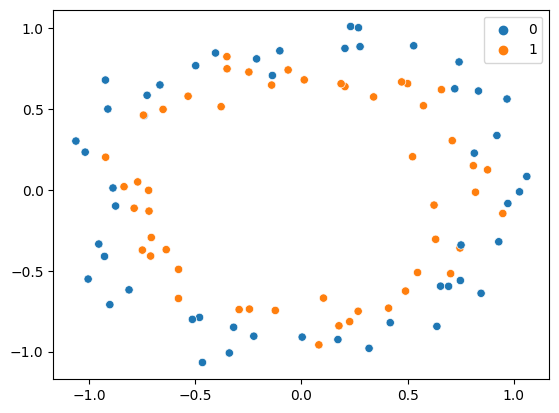

In [59]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [61]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [62]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

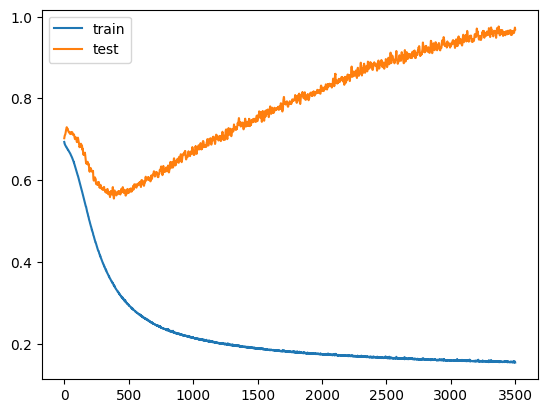

In [64]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 12s 1ms/step


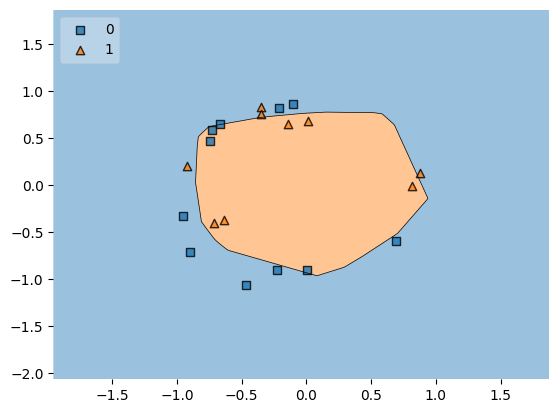

In [65]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

In [66]:
#Early Stopping
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 1s 86ms/step - loss: 0.6960 - accuracy: 0.4875 - val_loss: 0.6923 - val_accuracy: 0.4500
Epoch 2/3500
3/3 [==============================] - 0s 18ms/step - loss: 0.6938 - accuracy: 0.5000 - val_loss: 0.6947 - val_accuracy: 0.4500
Epoch 3/3500
3/3 [==============================] - 0s 18ms/step - loss: 0.6917 - accuracy: 0.5375 - val_loss: 0.6974 - val_accuracy: 0.4500
Epoch 4/3500
3/3 [==============================] - 0s 63ms/step - loss: 0.6906 - accuracy: 0.5250 - val_loss: 0.7006 - val_accuracy: 0.4500
Epoch 5/3500
3/3 [==============================] - 0s 30ms/step - loss: 0.6898 - accuracy: 0.5375 - val_loss: 0.7038 - val_accuracy: 0.4500
Epoch 6/3500
3/3 [==============================] - 0s 15ms/step - loss: 0.6885 - accuracy: 0.5500 - val_loss: 0.7055 - val_accuracy: 0.4000
Epoch 7/3500
3/3 [==============================] - 0s 17ms/step - loss: 0.6871 - accuracy: 0.5750 - val_loss: 0.7065 - val_accuracy: 0.4000
Epoch 8/3500


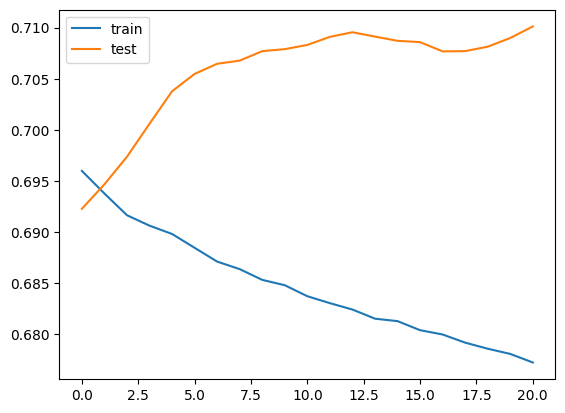

In [69]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 11s 1ms/step


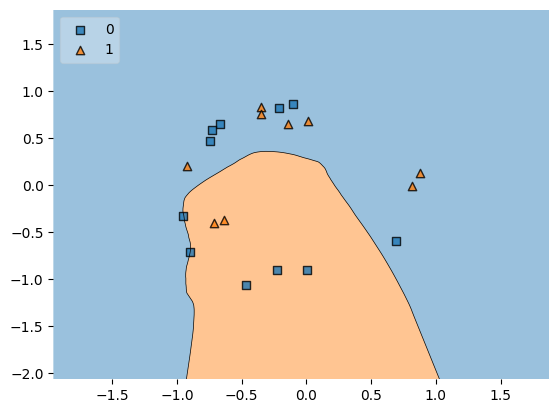

In [70]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

In [71]:
#Feature Scaling in ANN

In [72]:
import numpy as np
import pandas as pd

In [73]:
df = pd.read_csv('Social_Network_Ads.csv')
df

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]

In [74]:
df = df.iloc[:,2:]
df.head()

Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

In [75]:
import seaborn as sns

<AxesSubplot: xlabel='Age', ylabel='EstimatedSalary'>

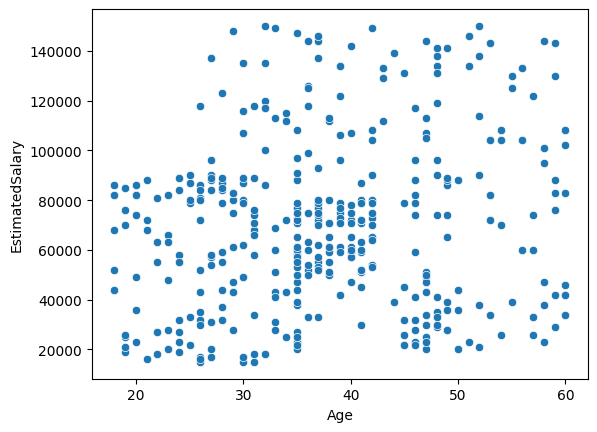

In [77]:
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1])

In [78]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [80]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [82]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               384       
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [84]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 18ms/step - loss: 714.5679 - accuracy: 0.4656 - val_loss: 22.9275 - val_accuracy: 0.6000
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 55.3185 - accuracy: 0.6062 - val_loss: 2.3155 - val_accuracy: 0.6250
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 41.1677 - accuracy: 0.5719 - val_loss: 75.3091 - val_accuracy: 0.6000
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 67.4789 - accuracy: 0.4437 - val_loss: 58.1336 - val_accuracy: 0.4000
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 61.7732 - accuracy: 0.5281 - val_loss: 103.4319 - val_accuracy: 0.6000
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 43.4976 - accuracy: 0.5219 - val_loss: 19.2096 - val_accuracy: 0.4000
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 40.4499 - accuracy: 0.5375 - val_loss: 26.9519 - val_accuracy: 0.40

Epoch 58/100
10/10 [==============================] - 0s 4ms/step - loss: 153.3859 - accuracy: 0.6219 - val_loss: 162.9077 - val_accuracy: 0.4000
Epoch 59/100
10/10 [==============================] - 0s 4ms/step - loss: 51.3722 - accuracy: 0.5406 - val_loss: 13.3698 - val_accuracy: 0.4000
Epoch 60/100
10/10 [==============================] - 0s 4ms/step - loss: 17.6565 - accuracy: 0.5312 - val_loss: 24.7096 - val_accuracy: 0.6000
Epoch 61/100
10/10 [==============================] - 0s 4ms/step - loss: 22.3562 - accuracy: 0.5781 - val_loss: 14.1029 - val_accuracy: 0.6000
Epoch 62/100
10/10 [==============================] - 0s 6ms/step - loss: 45.3699 - accuracy: 0.4594 - val_loss: 54.0627 - val_accuracy: 0.6000
Epoch 63/100
10/10 [==============================] - 0s 5ms/step - loss: 47.1638 - accuracy: 0.5656 - val_loss: 83.9726 - val_accuracy: 0.4000
Epoch 64/100
10/10 [==============================] - 0s 5ms/step - loss: 84.7070 - accuracy: 0.4781 - val_loss: 106.7385 - val_accura

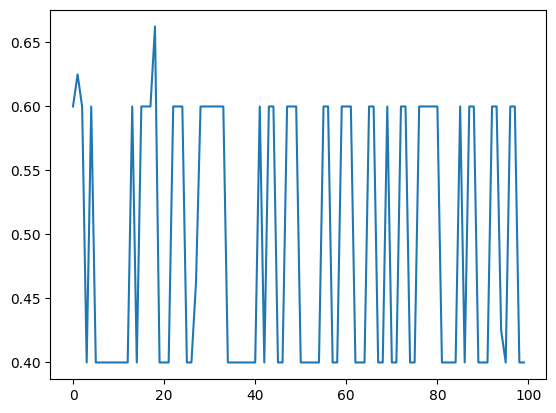

In [85]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [86]:
# Applying scaling

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [88]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<AxesSubplot: >

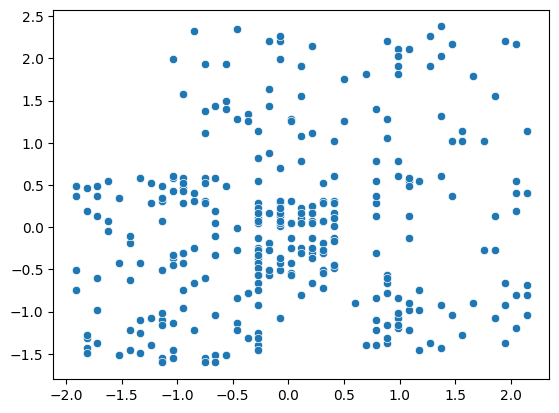

In [92]:
sns.scatterplot(x=X_train_scaled[:,0],y=X_train_scaled[:,1])

In [93]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 18ms/step - loss: 0.6482 - accuracy: 0.6719 - val_loss: 0.6140 - val_accuracy: 0.7250
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5927 - accuracy: 0.7531 - val_loss: 0.5596 - val_accuracy: 0.7500
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5474 - accuracy: 0.8031 - val_loss: 0.5146 - val_accuracy: 0.7750
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5089 - accuracy: 0.8188 - val_loss: 0.4778 - val_accuracy: 0.7875
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4765 - accuracy: 0.8344 - val_loss: 0.4467 - val_accuracy: 0.8000
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4487 - accuracy: 0.8469 - val_loss: 0.4219 - val_accuracy: 0.7875
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4239 - accuracy: 0.8531 - val_loss: 0.4008 - val_accuracy: 0.8000
Epoch 8/100


Epoch 59/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2374 - accuracy: 0.9000 - val_loss: 0.2688 - val_accuracy: 0.8875
Epoch 60/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2376 - accuracy: 0.9000 - val_loss: 0.2669 - val_accuracy: 0.8875
Epoch 61/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2365 - accuracy: 0.9031 - val_loss: 0.2665 - val_accuracy: 0.8875
Epoch 62/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2361 - accuracy: 0.9031 - val_loss: 0.2692 - val_accuracy: 0.8750
Epoch 63/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2358 - accuracy: 0.9031 - val_loss: 0.2714 - val_accuracy: 0.8750
Epoch 64/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2357 - accuracy: 0.9031 - val_loss: 0.2727 - val_accuracy: 0.8750
Epoch 65/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2352 - accuracy: 0.9031 - val_loss: 0.2698 - val_accuracy: 0.8750
Epoch 

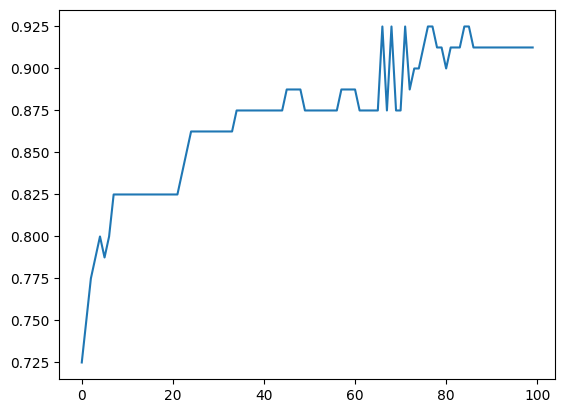

In [94]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [95]:
#Dropout Layers in ANN

In [96]:
import numpy as np
import matplotlib.pyplot as plt

In [97]:
X = np.array([[-1.58986e-01,  4.23977e-01],
       [-3.47926e-01,  4.70760e-01],
       [-5.04608e-01,  3.53801e-01],
       [-5.96774e-01,  1.14035e-01],
       [-5.18433e-01, -1.72515e-01],
       [-2.92627e-01, -2.07602e-01],
       [-1.58986e-01, -4.38596e-02],
       [-5.76037e-02,  1.43275e-01],
       [-7.14286e-02,  2.71930e-01],
       [-2.97235e-01,  3.47953e-01],
       [-4.17051e-01,  2.01754e-01],
       [-4.40092e-01,  8.77193e-03],
       [-3.24885e-01, -3.21637e-02],
       [-2.46544e-01,  5.55556e-02],
       [-2.18894e-01,  2.01754e-01],
       [-3.43318e-01,  1.60819e-01],
       [-5.09217e-01,  7.89474e-02],
       [-3.84793e-01, -9.06433e-02],
       [-1.49770e-01,  1.25731e-01],
       [-1.95853e-01,  3.24561e-01],
       [-3.91705e-02, -2.19298e-01],
       [-1.08295e-01, -3.01170e-01],
       [-1.86636e-01, -3.30409e-01],
       [-2.18894e-01, -4.23977e-01],
       [-8.06452e-02, -5.64327e-01],
       [ 6.68203e-02, -5.17544e-01],
       [ 9.44700e-02, -3.24561e-01],
       [ 1.86636e-01, -1.66667e-01],
       [ 6.22120e-02, -7.30994e-02],
       [ 2.07373e-02, -1.95906e-01],
       [ 2.99539e-02, -3.42105e-01],
       [-9.90783e-02, -3.77193e-01],
       [-6.91244e-03, -4.64912e-01],
       [ 1.31336e-01, -4.29825e-01],
       [ 2.32719e-01, -1.95906e-01],
       [ 8.52535e-02, -8.47953e-02],
       [-1.31336e-01, -2.36842e-01],
       [ 2.30415e-03, -1.25731e-01],
       [ 1.22120e-01, -2.92398e-03],
       [-3.47926e-01, -3.12865e-01],
       [-2.28111e-01, -1.25731e-01],
       [-7.60369e-02,  1.46199e-02],
       [ 4.37788e-02,  2.04678e-02],
       [ 1.15207e-02,  1.54971e-01],
       [-4.17051e-01, -1.60819e-01],
       [-3.15668e-01, -3.18713e-01],
       [ 1.26728e-01, -2.19298e-01],
       [ 2.05069e-01, -3.12865e-01],
       [ 2.18894e-01, -4.59064e-01],
       [ 7.14286e-02, -6.46199e-01],
       [-1.31336e-01, -6.05263e-01],
       [-2.09677e-01, -5.81871e-01],
       [-2.28111e-01, -4.29825e-01],
       [-1.45161e-01, -4.12281e-01],
       [-6.68203e-02, -4.82456e-01],
       [ 1.35945e-01, -5.11696e-01],
       [ 2.69585e-01, -4.06433e-01],
       [ 2.97235e-01, -2.95322e-01],
       [ 2.74194e-01, -1.72515e-01],
       [ 2.55760e-01, -4.97076e-02],
       [ 2.23502e-01, -4.97076e-02],
       [ 1.82028e-01, -8.47953e-02],
       [ 1.58986e-01, -1.54971e-01],
       [ 7.14286e-02, -2.13450e-01],
       [ 1.61290e-02, -2.66082e-01],
       [-2.53456e-02, -3.83041e-01],
       [-1.15207e-02, -4.82456e-01],
       [-2.30415e-03, -5.05848e-01],
       [ 2.53456e-02, -5.11696e-01],
       [ 2.53456e-02, -5.58480e-01],
       [ 1.15207e-02, -6.57895e-01],
       [-4.83871e-02, -6.46199e-01],
       [-8.52535e-02, -5.52632e-01],
       [-9.90783e-02, -5.00000e-01],
       [-1.61290e-02, -4.23977e-01],
       [ 1.31336e-01, -3.59649e-01],
       [ 2.23502e-01, -3.71345e-01],
       [ 2.92627e-01, -3.01170e-01],
       [ 2.60369e-01, -2.07602e-01],
       [ 2.00461e-01, -2.25146e-01],
       [ 1.72811e-01, -2.71930e-01],
       [-1.31336e-01,  9.06433e-02],
       [-1.49770e-01,  7.30994e-02],
       [-2.41935e-01,  6.14035e-02],
       [-3.01843e-01,  1.78363e-01],
       [-2.97235e-01,  1.95906e-01],
       [-2.74194e-01,  3.07018e-01],
       [-3.24885e-01,  2.95322e-01],
       [-3.98618e-01,  2.66082e-01],
       [-4.35484e-01,  1.60819e-01],
       [-4.72350e-01,  7.89474e-02],
       [-3.38710e-01,  4.38596e-02],
       [-2.69585e-01,  4.38596e-02],
       [-2.55760e-01,  1.02339e-01],
       [-1.68203e-01,  2.66082e-01],
       [-1.12903e-01,  3.01170e-01],
       [-3.91705e-02,  3.47953e-01],
       [-1.26728e-01,  4.41520e-01],
       [-2.32719e-01,  4.41520e-01],
       [-3.38710e-01,  4.18129e-01],
       [-4.12442e-01,  3.53801e-01],
       [-5.09217e-01,  2.19298e-01],
       [-5.41475e-01,  1.46199e-02],
       [-5.04608e-01, -1.25731e-01],
       [-4.90783e-01, -1.43275e-01],
       [-3.61751e-01, -1.37427e-01],
       [-2.69585e-01, -8.47953e-02],
       [-2.23502e-01, -7.89474e-02],
       [-1.86636e-01, -3.80117e-02],
       [-1.54378e-01, -8.77193e-03],
       [-1.12903e-01,  5.55556e-02],
       [-8.52535e-02,  1.37427e-01],
       [-8.52535e-02,  2.77778e-01],
       [-1.68203e-01,  3.01170e-01],
       [-1.91244e-01,  1.95906e-01],
       [-1.40553e-01, -4.97076e-02],
       [-2.99539e-02,  6.72515e-02],
       [-2.00461e-01, -2.30994e-01],
       [-1.08295e-01, -8.47953e-02],
       [ 3.45622e-02,  6.72515e-02],
       [ 8.06452e-02,  1.19883e-01],
       [-3.85369e-01,  3.30409e-02],
       [-3.81221e-01,  1.31287e-01],
       [-3.52189e-01,  2.58187e-01],
       [-3.54263e-01,  3.64620e-01],
       [-4.14401e-01, -6.92982e-02],
       [-4.99424e-01, -3.24561e-02],
       [-2.98272e-01, -9.79532e-02],
       [-3.16935e-01, -1.83918e-01],
       [-3.68779e-01, -2.90351e-01],
       [-3.56336e-01, -3.96784e-01],
       [-2.71313e-01,  4.38596e-03],
       [-1.77995e-01,  8.62573e-02],
       [-2.46429e-01,  1.43567e-01],
       [-2.50576e-01,  2.29532e-01],
       [-2.21544e-01,  3.76901e-01],
       [-2.15323e-01,  2.95029e-01],
       [-1.30300e-01,  2.17251e-01],
       [-2.07028e-01,  2.89474e-02],
       [-9.71198e-02,  2.13158e-01],
       [-3.90553e-02,  2.58187e-01],
       [ 1.90092e-02,  4.01462e-01],
       [-3.69816e-02,  4.21930e-01],
       [-6.39401e-02,  3.31871e-01],
       [-1.30300e-01,  3.76901e-01],
       [-3.75000e-01, -4.37719e-01],
       [-3.95737e-01, -3.51754e-01],
       [-3.54263e-01, -2.08480e-01],
       [-4.37212e-01, -3.76316e-01],
       [-4.80760e-01, -5.03216e-01],
       [-4.10253e-01, -4.66374e-01],
       [-2.48502e-01, -2.57602e-01],
       [-2.27765e-01, -3.14912e-01],
       [-2.83756e-01, -3.84503e-01],
       [-2.92051e-01, -4.54094e-01],
       [-3.37673e-01, -5.19591e-01],
       [-2.77535e-01, -5.48246e-01],
       [-2.07028e-01, -5.35965e-01],
       [-1.86290e-01, -4.78655e-01],
       [-1.32373e-01, -5.07310e-01],
       [-1.77995e-01, -2.98538e-01],
       [-1.65553e-01, -1.75731e-01],
       [-1.61406e-01, -1.26608e-01],
       [ 3.45622e-04,  2.58187e-01],
       [ 7.91475e-02,  3.56433e-01],
       [-2.66129e-02,  1.80409e-01],
       [-5.35714e-02,  7.80702e-02],
       [-1.41705e-02, -5.29240e-02],
       [-7.01613e-02, -1.63450e-01],
       [-6.39401e-02, -2.94444e-01],
       [-3.07604e-02, -4.66374e-01],
       [-5.77189e-02, -5.27778e-01],
       [-5.35714e-02, -3.96784e-01],
       [ 5.21889e-02, -4.17251e-01],
       [-1.62442e-02, -1.67544e-01],
       [-6.39401e-02, -8.56725e-02],
       [-6.18664e-02, -1.60819e-02],
       [-3.80184e-03,  4.38596e-03],
       [ 4.18203e-02,  2.04971e-01],
       [ 7.91475e-02,  1.92690e-01],
       [ 4.59677e-02,  2.54094e-01],
       [ 1.18548e-01,  1.92690e-01],
       [ 1.10253e-01,  8.62573e-02],
       [ 1.08180e-01, -6.92982e-02],
       [ 1.66244e-01, -2.42690e-02],
       [ 1.41359e-01,  6.57895e-02],
       [ 1.43433e-01,  1.68129e-01],
       [ 1.70392e-01,  1.92690e-01],
       [ 1.08180e-01,  2.99123e-01],
       [ 1.18548e-01,  3.19591e-01],
       [ 1.26843e-01,  3.93275e-01],
       [-8.67512e-02,  4.21930e-01],
       [-4.73502e-02,  5.07895e-01],
       [ 2.52304e-02,  5.20175e-01],
       [ 6.25576e-02,  5.52924e-01],
       [-5.87558e-03,  4.42398e-01],
       [-5.14977e-02,  5.73392e-01],
       [-8.05300e-02,  5.07895e-01],
       [-1.53111e-01,  5.52924e-01],
       [-1.11636e-01,  5.48830e-01],
       [-1.63479e-01,  4.91520e-01],
       [-2.52650e-01, -1.88012e-01],
       [-2.46429e-01, -3.65497e-02],
       [-3.21083e-01, -4.33626e-01],
       [-3.31452e-01, -6.05556e-01],
       [-3.85369e-01, -5.15497e-01],
       [-3.99885e-01, -6.21930e-01],
       [-1.24078e-01, -1.26608e-01],
       [-3.16935e-01, -2.28947e-01],
       [-2.94124e-01, -1.34795e-01],
       [-1.53111e-01,  1.84503e-01]])

In [98]:
y = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0.])

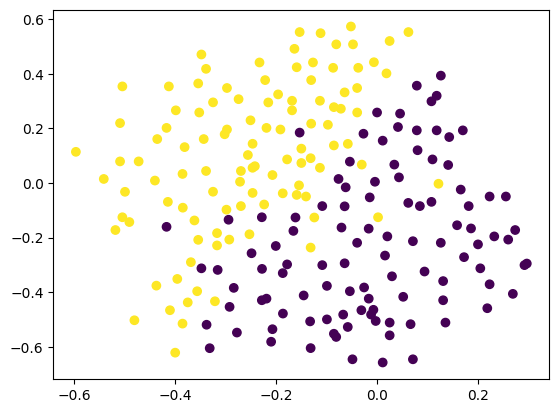

In [99]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [101]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
6/6 [==============================] - 1s 32ms/step - loss: 0.5332 - accuracy: 0.7798 - val_loss: 0.6765 - val_accuracy: 0.5814
Epoch 2/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2901 - accuracy: 0.8512 - val_loss: 0.5543 - val_accuracy: 0.6977
Epoch 3/500
6/6 [==============================] - 0s 9ms/step - loss: 0.2948 - accuracy: 0.8750 - val_loss: 0.3760 - val_accuracy: 0.8372
Epoch 4/500
6/6 [==============================] - 0s 10ms/step - loss: 0.2388 - accuracy: 0.8988 - val_loss: 0.3402 - val_accuracy: 0.8605
Epoch 5/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2196 - accuracy: 0.9167 - val_loss: 0.4209 - val_accuracy: 0.8140
Epoch 6/500
6/6 [==============================] - 0s 9ms/step - loss: 0.2090 - accuracy: 0.9167 - val_loss: 0.3617 - val_accuracy: 0.8605
Epoch 7/500
6/6 [==============================] - 0s 10ms/step - loss: 0.2148 - accuracy: 0.9464 - val_loss: 0.3014 - val_accuracy: 0.8837
Epoch 8/500
6/6 [=====

6/6 [==============================] - 0s 7ms/step - loss: 0.0863 - accuracy: 0.9643 - val_loss: 0.7075 - val_accuracy: 0.8605
Epoch 118/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0828 - accuracy: 0.9583 - val_loss: 0.7419 - val_accuracy: 0.8372
Epoch 119/500
6/6 [==============================] - 0s 9ms/step - loss: 0.0878 - accuracy: 0.9762 - val_loss: 0.7648 - val_accuracy: 0.8372
Epoch 120/500
6/6 [==============================] - 0s 9ms/step - loss: 0.0929 - accuracy: 0.9583 - val_loss: 0.7514 - val_accuracy: 0.8372
Epoch 121/500
6/6 [==============================] - 0s 10ms/step - loss: 0.0831 - accuracy: 0.9643 - val_loss: 0.7564 - val_accuracy: 0.8372
Epoch 122/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0825 - accuracy: 0.9702 - val_loss: 0.7727 - val_accuracy: 0.8372
Epoch 123/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0851 - accuracy: 0.9643 - val_loss: 0.8499 - val_accuracy: 0.8140
Epoch 124/500
6/6 [=======

6/6 [==============================] - 0s 6ms/step - loss: 0.0571 - accuracy: 0.9762 - val_loss: 1.0915 - val_accuracy: 0.8372
Epoch 234/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0577 - accuracy: 0.9762 - val_loss: 1.2898 - val_accuracy: 0.8140
Epoch 235/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0664 - accuracy: 0.9762 - val_loss: 1.2667 - val_accuracy: 0.7907
Epoch 236/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0660 - accuracy: 0.9702 - val_loss: 1.0283 - val_accuracy: 0.8372
Epoch 237/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0694 - accuracy: 0.9643 - val_loss: 0.9942 - val_accuracy: 0.8140
Epoch 238/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0700 - accuracy: 0.9762 - val_loss: 0.9727 - val_accuracy: 0.8372
Epoch 239/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0554 - accuracy: 0.9762 - val_loss: 1.0049 - val_accuracy: 0.8605
Epoch 240/500
6/6 [========

6/6 [==============================] - 0s 10ms/step - loss: 0.0895 - accuracy: 0.9643 - val_loss: 1.9282 - val_accuracy: 0.7907
Epoch 350/500
6/6 [==============================] - 0s 9ms/step - loss: 0.0382 - accuracy: 0.9821 - val_loss: 1.7552 - val_accuracy: 0.7907
Epoch 351/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0477 - accuracy: 0.9762 - val_loss: 1.7071 - val_accuracy: 0.7907
Epoch 352/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0297 - accuracy: 0.9881 - val_loss: 1.8131 - val_accuracy: 0.7907
Epoch 353/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0339 - accuracy: 0.9881 - val_loss: 1.5997 - val_accuracy: 0.7907
Epoch 354/500
6/6 [==============================] - 0s 9ms/step - loss: 0.0337 - accuracy: 0.9881 - val_loss: 1.5605 - val_accuracy: 0.8140
Epoch 355/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0292 - accuracy: 0.9940 - val_loss: 1.6859 - val_accuracy: 0.8140
Epoch 356/500
6/6 [=====

6/6 [==============================] - 0s 8ms/step - loss: 0.0321 - accuracy: 0.9881 - val_loss: 2.1891 - val_accuracy: 0.7674
Epoch 466/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0305 - accuracy: 0.9881 - val_loss: 2.3148 - val_accuracy: 0.7674
Epoch 467/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0346 - accuracy: 0.9821 - val_loss: 2.2900 - val_accuracy: 0.7442
Epoch 468/500
6/6 [==============================] - 0s 9ms/step - loss: 0.0301 - accuracy: 0.9881 - val_loss: 2.2671 - val_accuracy: 0.7442
Epoch 469/500
6/6 [==============================] - 0s 9ms/step - loss: 0.0313 - accuracy: 0.9881 - val_loss: 2.2758 - val_accuracy: 0.7442
Epoch 470/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0281 - accuracy: 0.9881 - val_loss: 2.1793 - val_accuracy: 0.7674
Epoch 471/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0276 - accuracy: 0.9881 - val_loss: 2.1778 - val_accuracy: 0.7674
Epoch 472/500
6/6 [========

In [102]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 10s 1ms/step


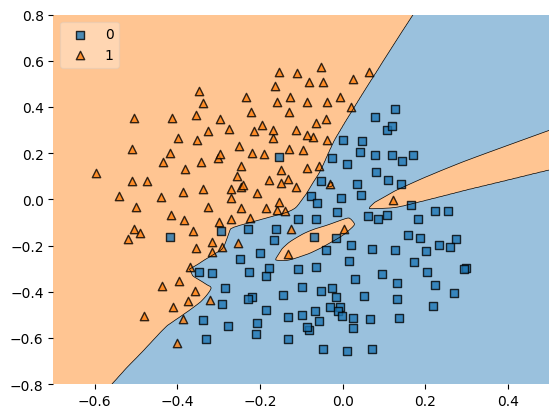

In [103]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.show()

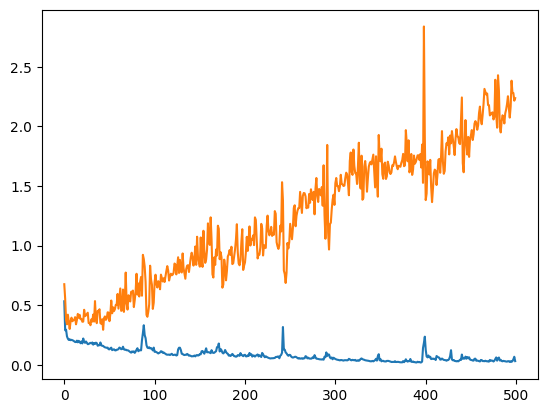

In [104]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

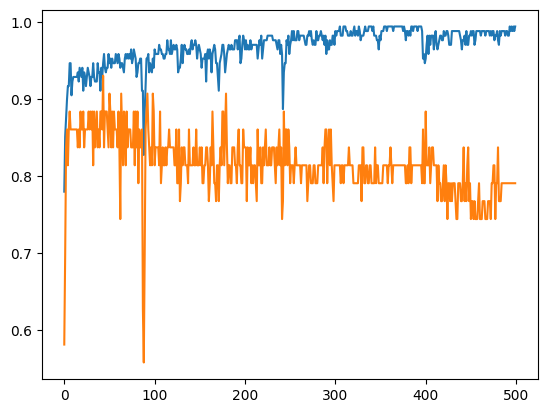

In [105]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [106]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
6/6 [==============================] - 1s 34ms/step - loss: 0.5843 - accuracy: 0.7738 - val_loss: 0.5785 - val_accuracy: 0.6512
Epoch 2/500
6/6 [==============================] - 0s 8ms/step - loss: 0.3317 - accuracy: 0.8750 - val_loss: 0.6250 - val_accuracy: 0.6744
Epoch 3/500
6/6 [==============================] - 0s 8ms/step - loss: 0.2558 - accuracy: 0.8869 - val_loss: 0.4733 - val_accuracy: 0.7442
Epoch 4/500
6/6 [==============================] - 0s 9ms/step - loss: 0.2521 - accuracy: 0.9048 - val_loss: 0.3940 - val_accuracy: 0.8605
Epoch 5/500
6/6 [==============================] - 0s 12ms/step - loss: 0.2757 - accuracy: 0.9048 - val_loss: 0.4105 - val_accuracy: 0.8140
Epoch 6/500
6/6 [==============================] - 0s 9ms/step - loss: 0.2391 - accuracy: 0.8988 - val_loss: 0.3681 - val_accuracy: 0.8372
Epoch 7/500
6/6 [==============================] - 0s 9ms/step - loss: 0.2757 - accuracy: 0.9048 - val_loss: 0.3867 - val_accuracy: 0.8372
Epoch 8/500
6/6 [========

6/6 [==============================] - 0s 12ms/step - loss: 0.1934 - accuracy: 0.9286 - val_loss: 0.4705 - val_accuracy: 0.8605
Epoch 118/500
6/6 [==============================] - 0s 8ms/step - loss: 0.1931 - accuracy: 0.9048 - val_loss: 0.4597 - val_accuracy: 0.8605
Epoch 119/500
6/6 [==============================] - 0s 18ms/step - loss: 0.1593 - accuracy: 0.9345 - val_loss: 0.4241 - val_accuracy: 0.8837
Epoch 120/500
6/6 [==============================] - 0s 9ms/step - loss: 0.1844 - accuracy: 0.9286 - val_loss: 0.5217 - val_accuracy: 0.8605
Epoch 121/500
6/6 [==============================] - 0s 7ms/step - loss: 0.1781 - accuracy: 0.9286 - val_loss: 0.6295 - val_accuracy: 0.8605
Epoch 122/500
6/6 [==============================] - 0s 8ms/step - loss: 0.2081 - accuracy: 0.9286 - val_loss: 0.4560 - val_accuracy: 0.8372
Epoch 123/500
6/6 [==============================] - 0s 7ms/step - loss: 0.1812 - accuracy: 0.9405 - val_loss: 0.4145 - val_accuracy: 0.8372
Epoch 124/500
6/6 [======

6/6 [==============================] - 0s 8ms/step - loss: 0.1653 - accuracy: 0.9286 - val_loss: 0.6466 - val_accuracy: 0.8605
Epoch 234/500
6/6 [==============================] - 0s 9ms/step - loss: 0.1754 - accuracy: 0.9048 - val_loss: 0.7523 - val_accuracy: 0.8605
Epoch 235/500
6/6 [==============================] - 0s 9ms/step - loss: 0.1406 - accuracy: 0.9464 - val_loss: 0.7015 - val_accuracy: 0.8605
Epoch 236/500
6/6 [==============================] - 0s 9ms/step - loss: 0.1806 - accuracy: 0.9226 - val_loss: 0.6281 - val_accuracy: 0.8605
Epoch 237/500
6/6 [==============================] - 0s 10ms/step - loss: 0.1543 - accuracy: 0.9345 - val_loss: 0.5994 - val_accuracy: 0.8837
Epoch 238/500
6/6 [==============================] - 0s 8ms/step - loss: 0.1579 - accuracy: 0.9405 - val_loss: 0.5992 - val_accuracy: 0.8837
Epoch 239/500
6/6 [==============================] - 0s 9ms/step - loss: 0.1930 - accuracy: 0.9286 - val_loss: 0.6205 - val_accuracy: 0.8605
Epoch 240/500
6/6 [=======

6/6 [==============================] - 0s 7ms/step - loss: 0.1637 - accuracy: 0.9226 - val_loss: 0.7950 - val_accuracy: 0.8605
Epoch 350/500
6/6 [==============================] - 0s 7ms/step - loss: 0.1479 - accuracy: 0.9524 - val_loss: 0.8026 - val_accuracy: 0.8605
Epoch 351/500
6/6 [==============================] - 0s 7ms/step - loss: 0.1687 - accuracy: 0.9226 - val_loss: 0.7923 - val_accuracy: 0.8605
Epoch 352/500
6/6 [==============================] - 0s 7ms/step - loss: 0.1454 - accuracy: 0.9345 - val_loss: 0.9330 - val_accuracy: 0.8605
Epoch 353/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1418 - accuracy: 0.9464 - val_loss: 0.9037 - val_accuracy: 0.8372
Epoch 354/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1522 - accuracy: 0.9286 - val_loss: 0.8376 - val_accuracy: 0.8372
Epoch 355/500
6/6 [==============================] - 0s 10ms/step - loss: 0.1657 - accuracy: 0.9167 - val_loss: 0.7930 - val_accuracy: 0.8605
Epoch 356/500
6/6 [======

6/6 [==============================] - 0s 8ms/step - loss: 0.1774 - accuracy: 0.9345 - val_loss: 0.6334 - val_accuracy: 0.8605
Epoch 466/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1278 - accuracy: 0.9464 - val_loss: 0.5974 - val_accuracy: 0.8605
Epoch 467/500
6/6 [==============================] - 0s 9ms/step - loss: 0.1473 - accuracy: 0.9345 - val_loss: 0.5986 - val_accuracy: 0.8837
Epoch 468/500
6/6 [==============================] - 0s 7ms/step - loss: 0.1445 - accuracy: 0.9345 - val_loss: 0.8154 - val_accuracy: 0.8605
Epoch 469/500
6/6 [==============================] - 0s 7ms/step - loss: 0.1679 - accuracy: 0.9345 - val_loss: 0.9645 - val_accuracy: 0.8605
Epoch 470/500
6/6 [==============================] - 0s 8ms/step - loss: 0.1677 - accuracy: 0.9286 - val_loss: 0.9039 - val_accuracy: 0.8605
Epoch 471/500
6/6 [==============================] - 0s 9ms/step - loss: 0.1544 - accuracy: 0.9286 - val_loss: 0.8796 - val_accuracy: 0.8372
Epoch 472/500
6/6 [=======

9600/9600 [==============================] - 10s 1ms/step


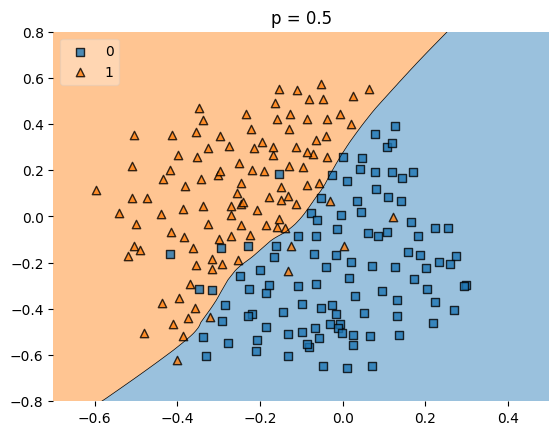

In [107]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.title('p = 0.5')
plt.show()

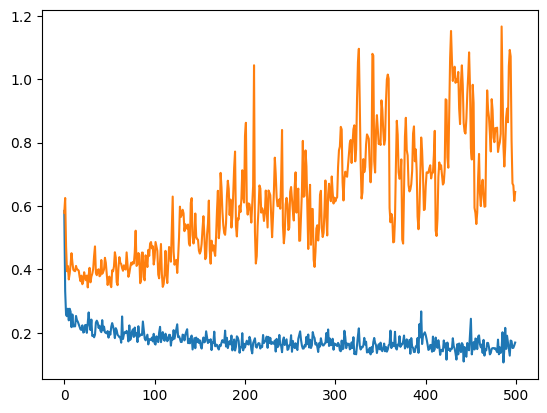

In [108]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

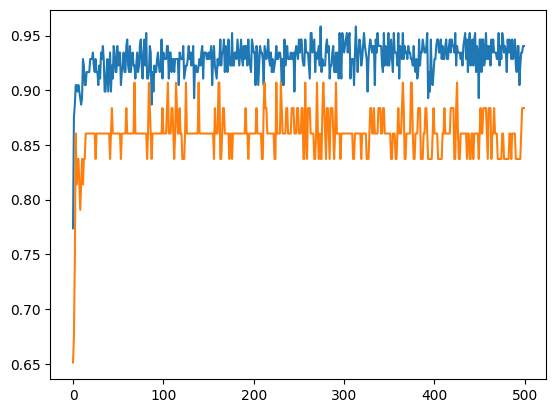

In [109]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [110]:
#Regression Dropout

In [111]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [112]:
X_train = np.linspace(-1, 1, 20)

In [113]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [114]:
X_test = np.linspace(-1, 1, 20)

In [115]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

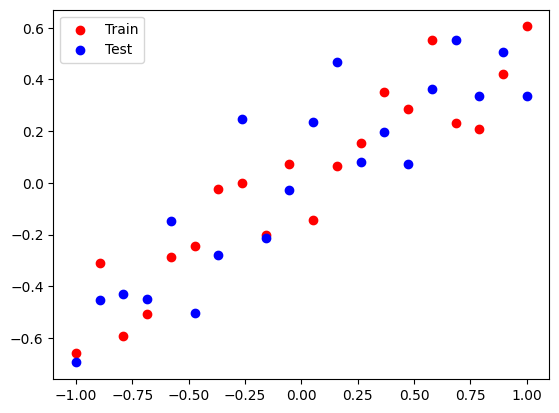

In [116]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

In [117]:
model_1 = Sequential()
model_1.add(Dense(128, input_dim=1, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model_1.fit(X_train, y_train, epochs=500, 
                    validation_data = (X_test, y_test),
                    verbose=False)

In [118]:
# evaluate the model
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.004595808684825897, Test: 0.045813340693712234


In [119]:
y_pred_1 = model_1.predict(X_test)

1/1 [==============================] - 0s 71ms/step


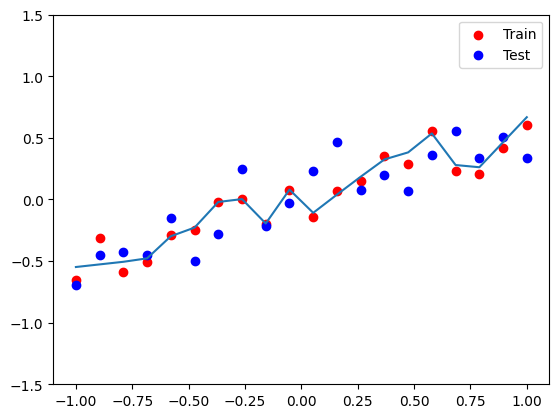

In [120]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

In [121]:
#with dropout

In [122]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500, 
                               validation_data = (X_test, y_test),
                               verbose=False)

In [123]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.013054916635155678, Test: 0.034845586866140366


In [124]:
y_pred_2 = model_2.predict(X_test)

1/1 [==============================] - 0s 55ms/step


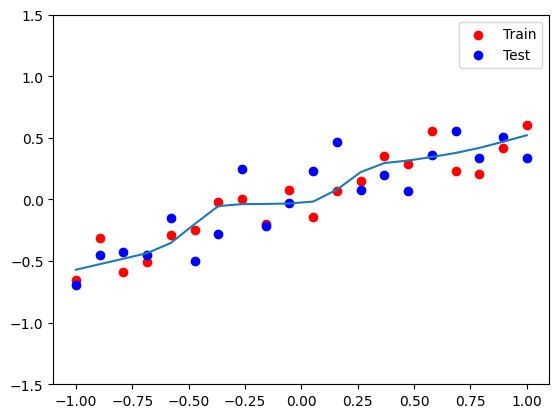

In [125]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

In [127]:
#regularization

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [129]:
X, y = make_moons(100, noise=0.25,random_state=2)

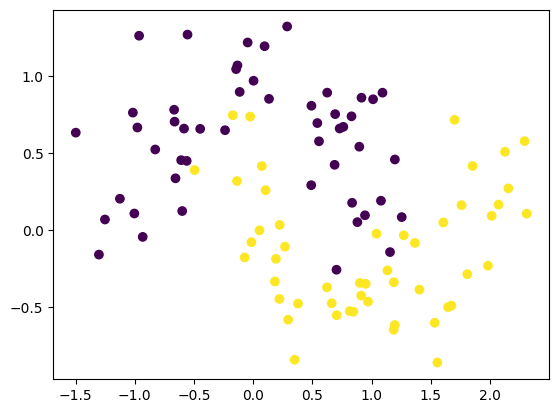

In [130]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [131]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 128)               384       
                                                                 
 dense_29 (Dense)            (None, 128)               16512     
                                                                 
 dense_30 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [133]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 11s 1ms/step


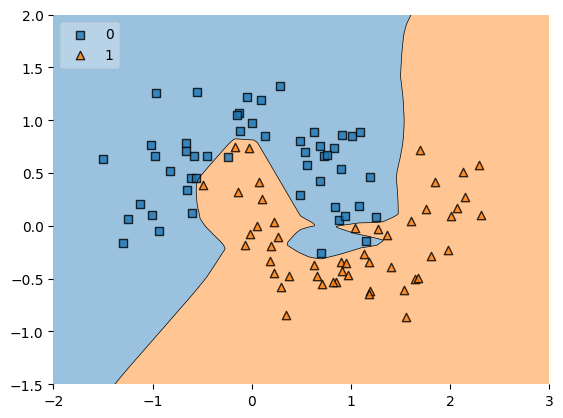

In [134]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

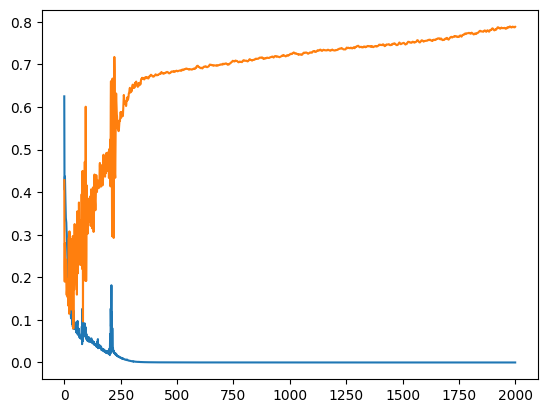

In [135]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [136]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 128)               384       
                                                                 
 dense_32 (Dense)            (None, 128)               16512     
                                                                 
 dense_33 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [137]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 11s 1ms/step


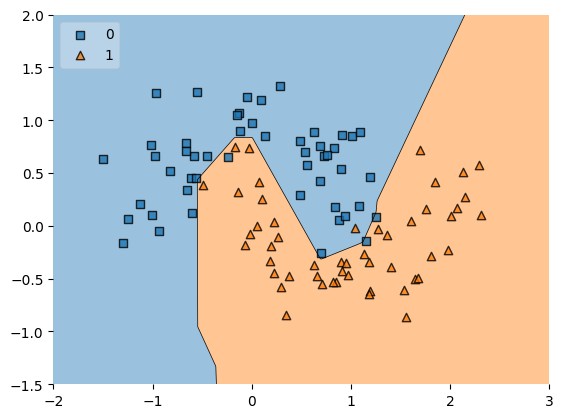

In [138]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

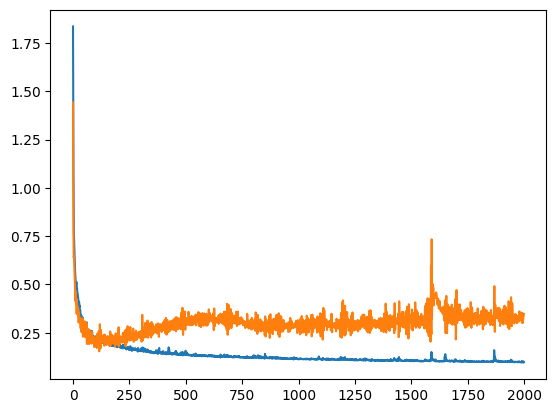

In [139]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [140]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<AxesSubplot: >

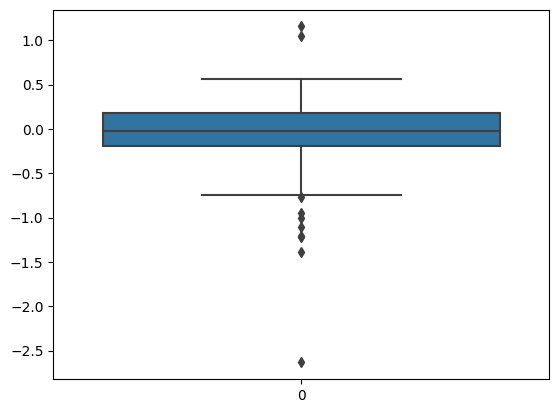

In [141]:
sns.boxplot(model1_weight_layer1)

<AxesSubplot: >

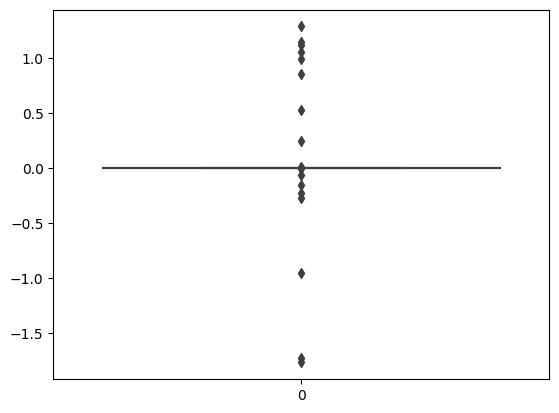

In [142]:
sns.boxplot(model2_weight_layer1)

In [143]:
model1_weight_layer1.min()

-2.6350548

In [144]:
model2_weight_layer1.min()

-1.76916

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_10564\2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_10564\2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<AxesSubplot: ylabel='Density'>

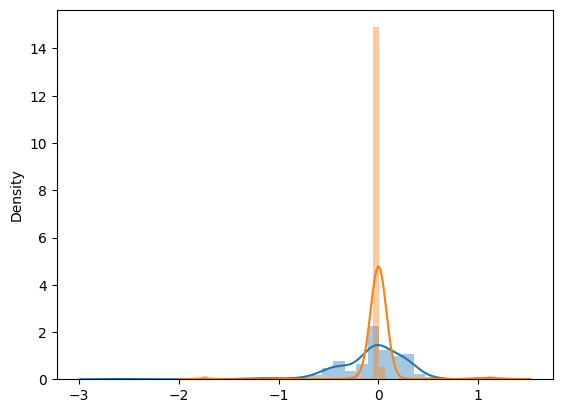

In [145]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [146]:
model1.get_weights()[0].reshape(256)

array([-2.26659566e-01, -3.54210377e-01, -4.79803950e-01,  1.28256958e-02,
        1.62661016e-01, -3.58896494e-01,  2.06776500e-01, -3.16855907e-01,
        2.66007762e-02,  2.60862350e-01,  1.70196056e-01, -3.55649292e-01,
       -1.48447081e-01, -5.01705445e-02,  3.13953519e-01,  2.26851925e-01,
       -4.99878645e-01, -3.49776596e-01, -4.94500518e-01, -5.82017541e-01,
       -1.81723654e-01,  1.90737739e-01,  2.66242266e-01, -5.79107881e-01,
       -4.23275009e-02, -2.18382150e-01,  1.73942417e-01, -4.10290778e-01,
       -4.42252271e-02,  1.94981188e-01,  2.16531903e-01,  3.73497069e-01,
       -4.65187013e-01,  6.85918182e-02, -2.09558513e-02, -4.17178810e-01,
       -7.59059265e-02, -7.00758696e-02, -4.35303092e-01, -3.16445857e-01,
        5.86085320e-02,  2.88312256e-01, -5.47130764e-01, -3.05141807e-01,
       -4.46874261e-01,  2.44266361e-01, -3.67421448e-01,  1.16185345e-01,
       -1.85449466e-01, -2.49121532e-01, -3.96524034e-02, -4.47146118e-01,
        4.00100619e-01,  

In [147]:
#Batch Normalization

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [151]:
df = pd.read_csv('concertriccir2.csv')
df.head()

X      Y  class
0  0.70 -0.247    0.0
1 -3.95  2.740    1.0
2  0.15 -2.160    1.0
3 -1.67 -0.942    1.0
4  2.56 -1.850    1.0

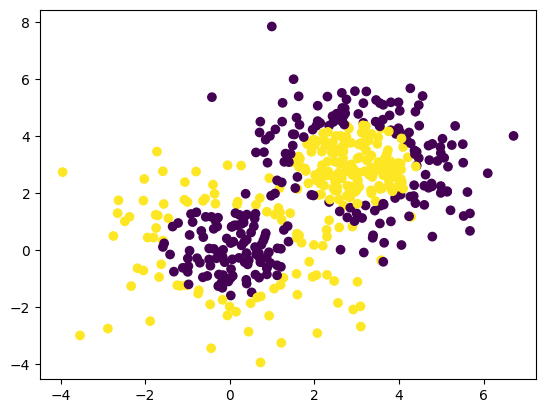

In [152]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [153]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [154]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [155]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 2)                 6         
                                                                 
 dense_35 (Dense)            (None, 2)                 6         
                                                                 
 dense_36 (Dense)            (None, 1)                 3         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [156]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [157]:
history1 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 1s 15ms/step - loss: 0.7284 - accuracy: 0.5025 - val_loss: 0.6934 - val_accuracy: 0.4300
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7256 - accuracy: 0.5300 - val_loss: 0.6938 - val_accuracy: 0.4300
Epoch 3/200
13/13 [==============================] - 0s 4ms/step - loss: 0.7231 - accuracy: 0.5250 - val_loss: 0.6942 - val_accuracy: 0.4300
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7208 - accuracy: 0.5225 - val_loss: 0.6947 - val_accuracy: 0.4300
Epoch 5/200
13/13 [==============================] - 0s 4ms/step - loss: 0.7184 - accuracy: 0.5225 - val_loss: 0.6950 - val_accuracy: 0.4300
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7165 - accuracy: 0.5150 - val_loss: 0.6954 - val_accuracy: 0.4300
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7145 - accuracy: 0.5150 - val_loss: 0.6956 - val_accuracy: 0.4300
Epoch 8/200


Epoch 59/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.5050 - val_loss: 0.6995 - val_accuracy: 0.4300
Epoch 60/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.5050 - val_loss: 0.6997 - val_accuracy: 0.4300
Epoch 61/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6940 - accuracy: 0.5050 - val_loss: 0.6996 - val_accuracy: 0.4300
Epoch 62/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6939 - accuracy: 0.5050 - val_loss: 0.6996 - val_accuracy: 0.4300
Epoch 63/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.5050 - val_loss: 0.6994 - val_accuracy: 0.4300
Epoch 64/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.5075 - val_loss: 0.6994 - val_accuracy: 0.4300
Epoch 65/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.5075 - val_loss: 0.6994 - val_accuracy: 0.4300
Epoch 

13/13 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5175 - val_loss: 0.6988 - val_accuracy: 0.4300
Epoch 174/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6925 - accuracy: 0.5175 - val_loss: 0.6988 - val_accuracy: 0.4300
Epoch 175/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6925 - accuracy: 0.5175 - val_loss: 0.6988 - val_accuracy: 0.4300
Epoch 176/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6925 - accuracy: 0.5175 - val_loss: 0.6988 - val_accuracy: 0.4300
Epoch 177/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5175 - val_loss: 0.6987 - val_accuracy: 0.4300
Epoch 178/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5175 - val_loss: 0.6986 - val_accuracy: 0.4300
Epoch 179/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6925 - accuracy: 0.5175 - val_loss: 0.6985 - val_accuracy: 0.4300
Epoch 180/200

In [158]:
model = Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 3)                 9         
                                                                 
 batch_normalization (BatchN  (None, 3)                12        
 ormalization)                                                   
                                                                 
 dense_38 (Dense)            (None, 2)                 8         
                                                                 
 batch_normalization_1 (Batc  (None, 2)                8         
 hNormalization)                                                 
                                                                 
 dense_39 (Dense)            (None, 1)                 3         
                                                                 
Total params: 40
Trainable params: 30
Non-trainable p

In [159]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [160]:
history2 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 1s 17ms/step - loss: 0.8821 - accuracy: 0.5300 - val_loss: 0.6904 - val_accuracy: 0.5700
Epoch 2/200
13/13 [==============================] - 0s 8ms/step - loss: 0.8625 - accuracy: 0.5125 - val_loss: 0.6885 - val_accuracy: 0.5700
Epoch 3/200
13/13 [==============================] - 0s 4ms/step - loss: 0.8361 - accuracy: 0.5375 - val_loss: 0.6876 - val_accuracy: 0.5700
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 0.8081 - accuracy: 0.5675 - val_loss: 0.6873 - val_accuracy: 0.5600
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7938 - accuracy: 0.5700 - val_loss: 0.6886 - val_accuracy: 0.5500
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 0.7961 - accuracy: 0.5750 - val_loss: 0.6910 - val_accuracy: 0.5500
Epoch 7/200
13/13 [==============================] - 0s 7ms/step - loss: 0.7604 - accuracy: 0.5825 - val_loss: 0.6930 - val_accuracy: 0.5500
Epoch 8/200


Epoch 59/200
13/13 [==============================] - 0s 6ms/step - loss: 0.5381 - accuracy: 0.7625 - val_loss: 0.5413 - val_accuracy: 0.8000
Epoch 60/200
13/13 [==============================] - 0s 5ms/step - loss: 0.5461 - accuracy: 0.7475 - val_loss: 0.5413 - val_accuracy: 0.8100
Epoch 61/200
13/13 [==============================] - 0s 5ms/step - loss: 0.5455 - accuracy: 0.7700 - val_loss: 0.5407 - val_accuracy: 0.8200
Epoch 62/200
13/13 [==============================] - 0s 5ms/step - loss: 0.5554 - accuracy: 0.7700 - val_loss: 0.5407 - val_accuracy: 0.7500
Epoch 63/200
13/13 [==============================] - 0s 5ms/step - loss: 0.5444 - accuracy: 0.7350 - val_loss: 0.5395 - val_accuracy: 0.7600
Epoch 64/200
13/13 [==============================] - 0s 6ms/step - loss: 0.5476 - accuracy: 0.7300 - val_loss: 0.5390 - val_accuracy: 0.7700
Epoch 65/200
13/13 [==============================] - 0s 5ms/step - loss: 0.5311 - accuracy: 0.7675 - val_loss: 0.5414 - val_accuracy: 0.8100
Epoch 

13/13 [==============================] - 0s 5ms/step - loss: 0.5185 - accuracy: 0.7675 - val_loss: 0.5216 - val_accuracy: 0.8000
Epoch 174/200
13/13 [==============================] - 0s 5ms/step - loss: 0.5473 - accuracy: 0.7400 - val_loss: 0.5204 - val_accuracy: 0.7600
Epoch 175/200
13/13 [==============================] - 0s 4ms/step - loss: 0.5426 - accuracy: 0.7525 - val_loss: 0.5205 - val_accuracy: 0.7600
Epoch 176/200
13/13 [==============================] - 0s 5ms/step - loss: 0.5182 - accuracy: 0.7675 - val_loss: 0.5210 - val_accuracy: 0.7500
Epoch 177/200
13/13 [==============================] - 0s 5ms/step - loss: 0.5186 - accuracy: 0.7800 - val_loss: 0.5210 - val_accuracy: 0.7800
Epoch 178/200
13/13 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7225 - val_loss: 0.5217 - val_accuracy: 0.7800
Epoch 179/200
13/13 [==============================] - 0s 5ms/step - loss: 0.5400 - accuracy: 0.7325 - val_loss: 0.5201 - val_accuracy: 0.7600
Epoch 180/200

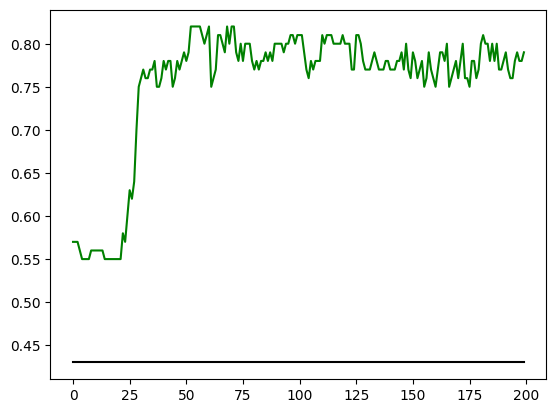

In [161]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')

In [162]:
#Keras Tuner

In [163]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import keras

In [164]:
# Reading the file
df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [165]:
df.shape # Shape of ‘df’

(768, 9)

In [166]:
df.columns # Prints columns of ‘df’

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [167]:
df.describe() # Displays properties of each column

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [168]:
dataset = df.values

In [170]:
X = dataset[:,0:8]
y = dataset[:,8].astype('int')

In [171]:
# Standardization
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [172]:
pd.DataFrame(X_standardized).describe()

0             1             2             3             4  \
count  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02   
mean  -6.476301e-17 -9.251859e-18  1.503427e-17  1.006140e-16 -3.006854e-17   
std    1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00   
min   -1.141852e+00 -3.783654e+00 -3.572597e+00 -1.288212e+00 -6.928906e-01   
25%   -8.448851e-01 -6.852363e-01 -3.673367e-01 -1.288212e+00 -6.928906e-01   
50%   -2.509521e-01 -1.218877e-01  1.496408e-01  1.545332e-01 -4.280622e-01   
75%    6.399473e-01  6.057709e-01  5.632228e-01  7.190857e-01  4.120079e-01   
max    3.906578e+00  2.444478e+00  2.734528e+00  4.921866e+00  6.652839e+00   

                  5             6             7  
count  7.680000e+02  7.680000e+02  7.680000e+02  
mean   2.590520e-16  2.451743e-16  1.931325e-16  
std    1.000652e+00  1.000652e+00  1.000652e+00  
min   -4.060474e+00 -1.189553e+00 -1.041549e+00  
25%   -5.955785e-01 -6.889685e-01 -7.862862e-01  
50%    9.419788e-04 -3.001282e-01 -3.608474e-01  
75%    5.847705e-01  4.662269e-01  6.602056e-01  
max    4.455807e+00  5.883565e+00  4.063716e+00

In [ ]:
#Tuning of Hyperparameters :- Batch Size and Epochs

In [173]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [189]:
#defining the model

def create_model():
    model = Sequential()
    model.add(Dense(8,input_dim = 8, kernel_initializer ='normal',activation = 'relu'))
    model.add(Dense(4,input_dim = 8, kernel_initializer ='normal',activation = 'relu'))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr=0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam, metrics = ['accuracy'])
    return model

In [190]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_10564\659144266.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)
C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.747 total time=   1.3s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.662 total time=   1.3s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.766 total time=   1.3s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.817 total time=   1.4s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.752 total time=   1.3s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

In [194]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7682879209518433, using {'batch_size': 40, 'epochs': 10}
0.7487904310226441,0.049884349623720785 with: {'batch_size': 10, 'epochs': 10}
0.7617944240570068,0.029533722399570035 with: {'batch_size': 10, 'epochs': 50}
0.7513708591461181,0.03253830571273072 with: {'batch_size': 10, 'epochs': 100}
0.764425766468048,0.04504819647995928 with: {'batch_size': 20, 'epochs': 10}
0.7513963222503662,0.03942711673163341 with: {'batch_size': 20, 'epochs': 50}
0.7630761384963989,0.04152061785325096 with: {'batch_size': 20, 'epochs': 100}
0.7682879209518433,0.04227460912793289 with: {'batch_size': 40, 'epochs': 10}
0.763144052028656,0.043429749407635374 with: {'batch_size': 40, 'epochs': 50}
0.7383498907089233,0.032715091594383995 with: {'batch_size': 40, 'epochs': 100}


In [ ]:
#Tuning of Hyperparameters:- Learning rate and Drop out rate

In [195]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 8,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 8,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_10564\3473897814.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.649 total time=   0.7s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.584 total time=   0.7s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.740 total time=   0.7s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.810 total time=   0.7s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.745 total time=   0.7s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [196]:
#Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [197]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 8,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 8,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters

param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_10564\736934633.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.649 total time=   0.9s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.584 total time=   1.0s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.630 total time=   0.9s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.745 total time=   1.2s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.353 total time=   0.9s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................
[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=0.649 total time=   1.0s
[CV 2/5; 2/12] START activation_

[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.824 total time=   1.0s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................
[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.752 total time=   1.0s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=0.760 total time=   0.8s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.701 total time=   0.8s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.766 total time=   0.8s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................
[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=0.837 total time=   0.8s
[CV 5/5; 11/12] START activation_fu

In [198]:
#Tuning of Hyperparameter :-Number of Neurons in activation layer

In [199]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 8,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_10564\3357022761.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.740 total time=   0.9s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.688 total time=   0.8s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.740 total time=   0.8s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.797 total time=   0.9s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.745 total time=   0.8s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.747 total time=   0.9s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 2/5; 2/9] END .........n

In [200]:
#The optimum values of Hyperparameters are as follows :-
#Batch size = 40
#Epochs = 10
#Dropout rate = 0.1
#Learning rate = 0.001
#Activation function = tanh
#Kernel Initializer = uniform
#No. of neurons in layer 1 = 16
#No. of neurons in layer 2 = 4

In [201]:
#Training model with optimum values of Hyperparameters

In [202]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 8,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 16,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Fitting the model

model.fit(X_standardized,y)

# Predicting using trained model

y_predict = model.predict(X_standardized)

# Printing the metrics

print(accuracy_score(y,y_predict))
print(classification_report(y,y_predict))

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_10564\3029200500.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


24/24 [==============================] - 0s 1ms/step
0.7747395833333334
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       500
           1       0.72      0.59      0.64       268

    accuracy                           0.77       768
   macro avg       0.76      0.73      0.74       768
weighted avg       0.77      0.77      0.77       768



In [ ]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 8,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[CV 1/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_10564\692096166.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)
C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.649 total time=   1.6s
[CV 2/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.584 total time=   1.7s
[CV 3/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.630 total time=   1.4s
[CV 4/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuro

[CV 1/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.649 total time=   2.1s
[CV 2/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 2/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.584 total time=   1.9s
[CV 3/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 3/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.630 total time=   1.8s
[CV 4/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuro

[CV 1/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.740 total time=   1.6s
[CV 2/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.727 total time=   1.8s
[CV 3/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 3/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.766 total time=   1.7s
[CV 4/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuro

[CV 1/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.734 total time=   1.4s
[CV 2/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.688 total time=   1.5s
[CV 3/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 3/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.760 total time=   1.7s
[CV 4/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16,

[CV 1/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.721 total time=   1.5s
[CV 2/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.682 total time=   1.3s
[CV 3/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 3/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.740 total time=   1.3s
[CV 4/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[

[CV 1/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.675 total time=   1.6s
[CV 2/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 2/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.740 total time=   1.4s
[CV 3/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 3/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.747 total time=   1.4s
[CV 4/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuro

[CV 1/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.649 total time=   1.2s
[CV 2/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 2/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.584 total time=   1.6s
[CV 3/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 3/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.630 total time=   1.2s
[CV 4/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuro

[CV 1/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.649 total time=   2.2s
[CV 2/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 2/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.584 total time=   1.8s
[CV 3/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 3/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.630 total time=   1.6s
[CV 4/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16,

[CV 1/5; 41/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.734 total time=   1.4s
[CV 2/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 41/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.688 total time=   1.3s
[CV 3/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 41/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.773 total time=   1.3s
[CV 4/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[

[CV 1/5; 46/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.695 total time=   1.3s
[CV 2/5; 46/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 46/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.662 total time=   1.3s
[CV 3/5; 46/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 46/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.734 total time=   1.3s
[CV 4/5; 46/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5

[CV 1/5; 51/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.708 total time=   1.7s
[CV 2/5; 51/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 2/5; 51/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.695 total time=   1.6s
[CV 3/5; 51/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 3/5; 51/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.766 total time=   1.5s
[CV 4/5; 51/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 4/5

[CV 1/5; 56/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.649 total time=   1.4s
[CV 2/5; 56/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 2/5; 56/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.584 total time=   1.5s
[CV 3/5; 56/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 3/5; 56/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.630 total time=   1.8s
[CV 4/5; 56/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5

[CV 1/5; 61/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.649 total time=   1.4s
[CV 2/5; 61/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[CV 2/5; 61/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.584 total time=   1.3s
[CV 3/5; 61/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[CV 3/5; 61/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.630 total time=   1.4s
[CV 4/5; 61/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[

[CV 1/5; 66/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.649 total time=   1.5s
[CV 2/5; 66/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 2/5; 66/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.584 total time=   1.6s
[CV 3/5; 66/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 3/5; 66/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.630 total time=   1.4s
[CV 4/5; 66/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 4/5; 66/8

[CV 1/5; 71/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.649 total time=   1.3s
[CV 2/5; 71/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 2/5; 71/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.584 total time=   1.4s
[CV 3/5; 71/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 3/5; 71/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.630 total time=   1.3s
[CV 4/5; 71/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 4/5

[CV 1/5; 76/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.649 total time=   1.4s
[CV 2/5; 76/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 76/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.584 total time=   1.5s
[CV 3/5; 76/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 76/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.630 total time=   1.4s
[CV 4/5; 76/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 76/8748] E

[CV 1/5; 81/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.649 total time=   1.3s
[CV 2/5; 81/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 2/5; 81/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.584 total time=   1.3s
[CV 3/5; 81/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 3/5; 81/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.630 total time=   1.5s
[CV 4/5; 81/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 4/5; 81/8

[CV 1/5; 86/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.740 total time=   5.6s
[CV 2/5; 86/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 2/5; 86/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.714 total time=   5.5s
[CV 3/5; 86/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 3/5; 86/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.766 total time=   6.2s
[CV 4/5; 86/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8,

[CV 1/5; 91/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.740 total time=   5.8s
[CV 2/5; 91/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 91/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.714 total time=   5.5s
[CV 3/5; 91/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 91/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.766 total time=   5.7s
[CV 4/5; 91/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuro

[CV 1/5; 96/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.701 total time=   6.3s
[CV 2/5; 96/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 96/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.695 total time=   6.3s
[CV 3/5; 96/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 3/5; 96/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.753 total time=   5.9s
[CV 4/5; 96/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuro

[CV 1/5; 101/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.721 total time=   5.7s
[CV 2/5; 101/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 101/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.721 total time=   5.8s
[CV 3/5; 101/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 101/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.753 total time=   6.1s
[CV 4/5; 101/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuro

[CV 1/5; 106/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.721 total time=   6.3s
[CV 2/5; 106/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 2/5; 106/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.688 total time=   6.3s
[CV 3/5; 106/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 3/5; 106/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.727 total time=   6.2s
[CV 4/5; 106/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16,

[CV 1/5; 111/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.740 total time=   5.4s
[CV 2/5; 111/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 2/5; 111/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.721 total time=   5.4s
[CV 3/5; 111/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 3/5; 111/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.760 total time=   5.3s
[CV 4/5; 111/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4,

[CV 1/5; 116/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.740 total time=   5.7s
[CV 2/5; 116/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 2/5; 116/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.734 total time=   5.6s
[CV 3/5; 116/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 3/5; 116/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.760 total time=   5.5s
[CV 4/5; 116/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuro

[CV 1/5; 121/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.747 total time=  11.5s
[CV 2/5; 121/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 121/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.669 total time=   5.3s
[CV 3/5; 121/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 3/5; 121/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.760 total time=   5.1s
[CV 4/5; 121/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuro

[CV 1/5; 126/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.721 total time=   4.3s
[CV 2/5; 126/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 2/5; 126/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.656 total time=   5.0s
[CV 3/5; 126/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 3/5; 126/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.792 total time=   4.5s
[CV 4/5; 126/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16,

[CV 1/5; 131/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.721 total time=   4.3s
[CV 2/5; 131/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 131/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.688 total time=   4.5s
[CV 3/5; 131/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 131/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.766 total time=   4.4s
[CV 4/5; 131/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[

[CV 1/5; 136/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.649 total time=   4.4s
[CV 2/5; 136/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 136/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.584 total time=   4.5s
[CV 3/5; 136/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 136/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.630 total time=   4.4s
[CV 4/5; 136/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[

[CV 1/5; 141/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.649 total time=   4.4s
[CV 2/5; 141/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 2/5; 141/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.584 total time=   4.3s
[CV 3/5; 141/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 3/5; 141/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.630 total time=   4.5s
[CV 4/5; 141/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[

[CV 1/5; 146/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.649 total time=   4.3s
[CV 2/5; 146/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 146/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.584 total time=   4.4s
[CV 3/5; 146/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 3/5; 146/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.630 total time=   4.3s
[CV 4/5; 146/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5

[CV 1/5; 151/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.649 total time=   4.4s
[CV 2/5; 151/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 151/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.584 total time=   4.3s
[CV 3/5; 151/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 3/5; 151/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.630 total time=   4.4s
[CV 4/5; 151/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[

[CV 1/5; 156/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.649 total time=   4.3s
[CV 2/5; 156/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 156/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.584 total time=   4.3s
[CV 3/5; 156/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 3/5; 156/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.630 total time=   4.3s
[CV 4/5; 156/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 4/5; 156/

[CV 1/5; 161/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.649 total time=   4.5s
[CV 2/5; 161/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 2/5; 161/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.584 total time=   4.3s
[CV 3/5; 161/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 3/5; 161/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.630 total time=   4.3s
[CV 4/5; 161/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 4/5

[CV 1/5; 166/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.734 total time=   8.2s
[CV 2/5; 166/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 2/5; 166/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.714 total time=   8.0s
[CV 3/5; 166/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 3/5; 166/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.766 total time=   8.1s
[CV 4/5; 166/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001

[CV 5/5; 170/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.758 total time=   7.8s
[CV 1/5; 171/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 171/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.727 total time=   7.7s
[CV 2/5; 171/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 2/5; 171/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.695 total time=   7.9s
[CV 3/5; 171/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=

[CV 5/5; 175/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.797 total time=   7.9s
[CV 1/5; 176/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 176/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.727 total time=   8.2s
[CV 2/5; 176/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 176/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.630 total time=   8.2s
[CV 3/5; 176/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neur

[CV 5/5; 180/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.784 total time=   7.7s
[CV 1/5; 181/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 181/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.721 total time=   8.1s
[CV 2/5; 181/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 181/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.721 total time=   7.7s
[CV 3/5; 181/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=

[CV 5/5; 185/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.778 total time=   7.8s
[CV 1/5; 186/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 186/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.701 total time=   7.7s
[CV 2/5; 186/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 2/5; 186/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.662 total time=   8.4s
[CV 3/5; 186/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8,

[CV 5/5; 190/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.752 total time=   8.4s
[CV 1/5; 191/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 1/5; 191/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.747 total time=   8.4s
[CV 2/5; 191/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 2/5; 191/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.695 total time=   8.3s
[CV 3/5; 191/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neur

[CV 5/5; 195/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.752 total time=   8.4s
[CV 1/5; 196/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 1/5; 196/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.734 total time=   8.3s
[CV 2/5; 196/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 2/5; 196/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.701 total time=   8.3s
[CV 3/5; 196/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, 

[CV 5/5; 200/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.765 total time=   8.5s
[CV 1/5; 201/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 201/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.721 total time=   8.3s
[CV 2/5; 201/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 2/5; 201/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.682 total time=   8.4s
[CV 3/5; 201/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4,

[CV 5/5; 205/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.765 total time=   8.4s
[CV 1/5; 206/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 1/5; 206/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.701 total time=   8.4s
[CV 2/5; 206/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 2/5; 206/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.643 total time=   8.5s
[CV 3/5; 206/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuro

[CV 5/5; 210/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.732 total time=   8.5s
[CV 1/5; 211/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 211/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.701 total time=   8.4s
[CV 2/5; 211/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 211/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.675 total time=   8.8s
[CV 3/5; 211/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuro

[CV 5/5; 215/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.745 total time=   9.0s
[CV 1/5; 216/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 1/5; 216/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.740 total time=   8.4s
[CV 2/5; 216/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 2/5; 216/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.688 total time=   8.3s
[CV 3/5; 216/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16,

[CV 5/5; 220/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.647 total time=   8.4s
[CV 1/5; 221/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 1/5; 221/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.649 total time=   8.5s
[CV 2/5; 221/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 2/5; 221/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.584 total time=   8.4s
[CV 3/5; 221/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuro

[CV 5/5; 225/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.647 total time=   8.5s
[CV 1/5; 226/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 226/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.649 total time=   8.4s
[CV 2/5; 226/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 226/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.584 total time=   8.5s
[CV 3/5; 226/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2

[CV 5/5; 230/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.647 total time=   8.2s
[CV 1/5; 231/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 231/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.649 total time=   8.3s
[CV 2/5; 231/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 231/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.584 total time=   8.3s
[CV 3/5; 231/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[

[CV 5/5; 235/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.647 total time=   8.4s
[CV 1/5; 236/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 236/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.649 total time=   8.1s
[CV 2/5; 236/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 236/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.584 total time=   8.4s
[CV 3/5; 236/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5

[CV 5/5; 240/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.647 total time=   8.7s
[CV 1/5; 241/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 1/5; 241/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.649 total time=   8.8s
[CV 2/5; 241/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 2/5; 241/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.584 total time=   8.6s
[CV 3/5; 241/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[C

[CV 5/5; 245/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.647 total time=   1.8s
[CV 1/5; 246/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 1/5; 246/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.649 total time=   1.8s
[CV 2/5; 246/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 2/5; 246/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.584 total time=   1.6s
[CV 3/5; 246/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neur

[CV 5/5; 250/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.647 total time=   2.1s
[CV 1/5; 251/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 1/5; 251/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.649 total time=   1.8s
[CV 2/5; 251/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 2/5; 251/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.584 total time=   1.6s
[CV 3/5; 251/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001,

[CV 5/5; 255/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.771 total time=   1.6s
[CV 1/5; 256/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 256/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.747 total time=   1.5s
[CV 2/5; 256/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 256/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.675 total time=   2.1s
[CV 3/5; 256/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8,

[CV 5/5; 260/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.771 total time=   1.6s
[CV 1/5; 261/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 1/5; 261/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.714 total time=   1.6s
[CV 2/5; 261/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 2/5; 261/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.688 total time=   1.6s
[CV 3/5; 261/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuro

[CV 5/5; 265/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.647 total time=   1.5s
[CV 1/5; 266/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 266/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.636 total time=   1.5s
[CV 2/5; 266/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 266/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.695 total time=   1.7s
[CV 3/5; 266/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuro

[CV 5/5; 270/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.725 total time=   1.6s
[CV 1/5; 271/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 271/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.649 total time=   1.6s
[CV 2/5; 271/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 271/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.584 total time=   1.6s
[CV 3/5; 271/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4,

[CV 5/5; 275/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.647 total time=   1.6s
[CV 1/5; 276/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 276/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.649 total time=   1.6s
[CV 2/5; 276/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 2/5; 276/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.584 total time=   1.6s
[CV 3/5; 276/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8,

[CV 5/5; 280/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.765 total time=   1.6s
[CV 1/5; 281/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 281/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.760 total time=   1.6s
[CV 2/5; 281/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 281/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.740 total time=   1.6s
[CV 3/5; 281/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuro

[CV 5/5; 285/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.771 total time=   1.7s
[CV 1/5; 286/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 286/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.727 total time=   1.6s
[CV 2/5; 286/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 286/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.688 total time=   1.5s
[CV 3/5; 286/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, 

[CV 5/5; 290/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.732 total time=   1.6s
[CV 1/5; 291/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 291/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.688 total time=   1.6s
[CV 2/5; 291/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 291/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.656 total time=   1.6s
[CV 3/5; 291/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[

[CV 5/5; 295/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.758 total time=   1.5s
[CV 1/5; 296/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 1/5; 296/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.734 total time=   1.6s
[CV 2/5; 296/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 2/5; 296/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.708 total time=   1.5s
[CV 3/5; 296/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuro

[CV 5/5; 300/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.647 total time=   1.5s
[CV 1/5; 301/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 301/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.649 total time=   2.2s
[CV 2/5; 301/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 2/5; 301/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.584 total time=   1.8s
[CV 3/5; 301/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[

[CV 5/5; 305/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.647 total time=   1.9s
[CV 1/5; 306/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 306/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.649 total time=   1.7s
[CV 2/5; 306/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 2/5; 306/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.584 total time=   1.6s
[CV 3/5; 306/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuro

[CV 5/5; 310/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.739 total time=   2.0s
[CV 1/5; 311/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 311/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.727 total time=   2.0s
[CV 2/5; 311/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 311/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.714 total time=   2.6s
[CV 3/5; 311/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5

[CV 5/5; 315/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.765 total time=   1.4s
[CV 1/5; 316/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 316/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.695 total time=   2.0s
[CV 2/5; 316/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 316/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.727 total time=   1.5s
[CV 3/5; 316/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 31

[CV 5/5; 320/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.752 total time=   2.0s
[CV 1/5; 321/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 321/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.740 total time=   1.5s
[CV 2/5; 321/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 2/5; 321/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.688 total time=   1.4s
[CV 3/5; 321/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 3/5; 321/

[CV 5/5; 325/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.778 total time=   5.6s
[CV 1/5; 326/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 1/5; 326/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.740 total time=   5.7s
[CV 2/5; 326/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 2/5; 326/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.734 total time=   5.4s
[CV 3/5; 326/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neur

[CV 5/5; 330/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.765 total time=   4.9s
[CV 1/5; 331/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 1/5; 331/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.747 total time=   5.3s
[CV 2/5; 331/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 2/5; 331/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.727 total time=   5.1s
[CV 3/5; 331/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, 

[CV 5/5; 335/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.778 total time=   5.1s
[CV 1/5; 336/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 336/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.753 total time=   5.2s
[CV 2/5; 336/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 2/5; 336/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.695 total time=   5.0s
[CV 3/5; 336/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4,

[CV 5/5; 340/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.784 total time=   5.1s
[CV 1/5; 341/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 1/5; 341/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.708 total time=   5.2s
[CV 2/5; 341/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 2/5; 341/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.649 total time=   5.1s
[CV 3/5; 341/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuro

[CV 5/5; 345/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.765 total time=   5.2s
[CV 1/5; 346/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 346/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.734 total time=   6.3s
[CV 2/5; 346/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 346/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.688 total time=   5.1s
[CV 3/5; 346/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuro

[CV 5/5; 350/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.725 total time=   5.1s
[CV 1/5; 351/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 1/5; 351/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.747 total time=   5.3s
[CV 2/5; 351/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 2/5; 351/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.708 total time=   5.1s
[CV 3/5; 351/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16,

[CV 5/5; 355/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.765 total time=   5.1s
[CV 1/5; 356/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 1/5; 356/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.747 total time=   5.3s
[CV 2/5; 356/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 2/5; 356/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.740 total time=   5.2s
[CV 3/5; 356/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8,

[CV 5/5; 360/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.765 total time=   5.5s
[CV 1/5; 361/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 361/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.721 total time=   5.1s
[CV 2/5; 361/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 361/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.701 total time=   5.5s
[CV 3/5; 361/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neu

[CV 5/5; 365/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.771 total time=   5.2s
[CV 1/5; 366/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 366/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.747 total time=   5.1s
[CV 2/5; 366/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 366/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.675 total time=   5.2s
[CV 3/5; 366/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuro

[CV 5/5; 370/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.765 total time=   5.1s
[CV 1/5; 371/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 371/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.695 total time=   5.1s
[CV 2/5; 371/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 371/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.714 total time=   5.1s
[CV 3/5; 371/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[

[CV 5/5; 375/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.732 total time=   5.3s
[CV 1/5; 376/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2
[CV 1/5; 376/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.695 total time=   5.1s
[CV 2/5; 376/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2
[CV 2/5; 376/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.675 total time=   5.3s
[CV 3/5; 376/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron

[CV 5/5; 380/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.765 total time=   5.2s
[CV 1/5; 381/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 1/5; 381/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.740 total time=   5.1s
[CV 2/5; 381/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 2/5; 381/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.753 total time=   5.0s
[CV 3/5; 381/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[

[CV 5/5; 385/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.758 total time=   5.1s
[CV 1/5; 386/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 1/5; 386/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.747 total time=   5.0s
[CV 2/5; 386/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 2/5; 386/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.721 total time=   5.2s
[CV 3/5; 386/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuro

[CV 5/5; 390/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.765 total time=   5.2s
[CV 1/5; 391/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 391/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.727 total time=   5.3s
[CV 2/5; 391/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 391/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.701 total time=   5.1s
[CV 3/5; 391/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 3/5

[CV 5/5; 395/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.797 total time=   5.1s
[CV 1/5; 396/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 1/5; 396/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.727 total time=   5.2s
[CV 2/5; 396/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 2/5; 396/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.688 total time=   5.4s
[CV 3/5; 396/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[

[CV 5/5; 400/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.745 total time=   5.3s
[CV 1/5; 401/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 401/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.779 total time=   5.1s
[CV 2/5; 401/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 401/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.662 total time=   5.1s
[CV 3/5; 401/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 401/

[CV 5/5; 405/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.725 total time=   5.1s
[CV 1/5; 406/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 406/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.727 total time=   9.3s
[CV 2/5; 406/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 406/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.747 total time=   9.3s
[CV 3/5; 406/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neu

[CV 5/5; 410/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.758 total time=   9.5s
[CV 1/5; 411/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 411/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.734 total time=   9.4s
[CV 2/5; 411/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 2/5; 411/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.714 total time=   9.3s
[CV 3/5; 411/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001

[CV 4/5; 415/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.804 total time=   9.5s
[CV 5/5; 415/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 415/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.765 total time=   9.3s
[CV 1/5; 416/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 416/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.727 total time=   9.5s
[CV 2/5; 416/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neur

[CV 4/5; 420/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.824 total time=   9.5s
[CV 5/5; 420/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 5/5; 420/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.752 total time=   9.6s
[CV 1/5; 421/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 421/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.714 total time=   9.5s
[CV 2/5; 421/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, ne

[CV 4/5; 425/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.830 total time=   9.4s
[CV 5/5; 425/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 425/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.758 total time=   9.6s
[CV 1/5; 426/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 426/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.727 total time=   9.6s
[CV 2/5; 426/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4,

[CV 4/5; 430/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.778 total time=   9.6s
[CV 5/5; 430/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 5/5; 430/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.739 total time=   9.5s
[CV 1/5; 431/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 1/5; 431/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.734 total time=   9.6s
[CV 2/5; 431/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuro

[CV 4/5; 435/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.850 total time=   9.5s
[CV 5/5; 435/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 5/5; 435/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.765 total time=   9.6s
[CV 1/5; 436/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 436/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.740 total time=  10.3s
[CV 2/5; 436/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neur

[CV 4/5; 440/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.824 total time=   9.5s
[CV 5/5; 440/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 440/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.752 total time=   9.6s
[CV 1/5; 441/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 441/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.734 total time=   9.7s
[CV 2/5; 441/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001,

[CV 4/5; 445/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.784 total time=   9.7s
[CV 5/5; 445/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 445/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.778 total time=   9.2s
[CV 1/5; 446/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 446/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.695 total time=   9.5s
[CV 2/5; 446/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8,

[CV 4/5; 450/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.804 total time=   9.9s
[CV 5/5; 450/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 5/5; 450/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.778 total time=   9.8s
[CV 1/5; 451/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 451/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.721 total time=   9.6s
[CV 2/5; 451/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4,

[CV 4/5; 455/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.804 total time=   9.6s
[CV 5/5; 455/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 455/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.745 total time=   9.6s
[CV 1/5; 456/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 456/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.727 total time=   9.5s
[CV 2/5; 456/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuro

[CV 4/5; 460/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.850 total time=   9.7s
[CV 5/5; 460/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 5/5; 460/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.758 total time=   9.7s
[CV 1/5; 461/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 1/5; 461/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.740 total time=   9.5s
[CV 2/5; 461/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuro

[CV 4/5; 465/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.837 total time=   9.9s
[CV 5/5; 465/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 5/5; 465/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.758 total time=   9.5s
[CV 1/5; 466/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[CV 1/5; 466/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.740 total time=   9.7s
[CV 2/5; 466/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, ne

[CV 4/5; 470/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.830 total time=   9.6s
[CV 5/5; 470/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 470/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.758 total time=   9.6s
[CV 1/5; 471/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 471/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.721 total time=   9.7s
[CV 2/5; 471/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[

[CV 4/5; 475/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.771 total time=  10.1s
[CV 5/5; 475/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 5/5; 475/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.824 total time=   9.7s
[CV 1/5; 476/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 1/5; 476/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.727 total time=   9.8s
[CV 2/5; 476/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuro

[CV 4/5; 480/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.830 total time=   9.8s
[CV 5/5; 480/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 5/5; 480/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.732 total time=   9.8s
[CV 1/5; 481/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 481/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.701 total time=   9.9s
[CV 2/5; 481/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5

[CV 4/5; 485/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.765 total time=   9.8s
[CV 5/5; 485/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 5/5; 485/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.712 total time=   9.9s
[CV 1/5; 486/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 1/5; 486/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.721 total time=  10.0s
[CV 2/5; 486/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[

[CV 4/5; 490/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.745 total time=   1.5s
[CV 5/5; 490/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 5/5; 490/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.647 total time=   2.4s
[CV 1/5; 491/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 1/5; 491/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.649 total time=   1.9s
[CV 2/5; 491/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neur

[CV 4/5; 495/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.745 total time=   1.6s
[CV 5/5; 495/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 5/5; 495/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.647 total time=   1.6s
[CV 1/5; 496/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 496/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.747 total time=   1.6s
[CV 2/5; 496/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neur

[CV 4/5; 500/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.843 total time=   1.7s
[CV 5/5; 500/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 500/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.745 total time=   1.7s
[CV 1/5; 501/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 501/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.734 total time=   1.7s
[CV 2/5; 501/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8,

[CV 4/5; 505/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.765 total time=   1.6s
[CV 5/5; 505/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 505/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.739 total time=   1.6s
[CV 1/5; 506/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 506/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.688 total time=   1.6s
[CV 2/5; 506/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuro

[CV 4/5; 510/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.830 total time=   1.8s
[CV 5/5; 510/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 5/5; 510/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.739 total time=   1.7s
[CV 1/5; 511/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 1/5; 511/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.714 total time=   1.6s
[CV 2/5; 511/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, ne

[CV 4/5; 515/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.745 total time=   1.6s
[CV 5/5; 515/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 515/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.647 total time=   1.6s
[CV 1/5; 516/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 1/5; 516/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.649 total time=   1.6s
[CV 2/5; 516/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4,

[CV 4/5; 520/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.745 total time=   1.6s
[CV 5/5; 520/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 5/5; 520/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.647 total time=   1.6s
[CV 1/5; 521/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 1/5; 521/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.649 total time=   1.6s
[CV 2/5; 521/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuro

[CV 4/5; 525/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.837 total time=   1.6s
[CV 5/5; 525/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 5/5; 525/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.771 total time=   1.6s
[CV 1/5; 526/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 526/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.740 total time=   1.6s
[CV 2/5; 526/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuro

[CV 4/5; 530/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.830 total time=   1.6s
[CV 5/5; 530/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 5/5; 530/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.771 total time=   1.6s
[CV 1/5; 531/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 1/5; 531/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.734 total time=   1.8s
[CV 2/5; 531/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16,

[CV 4/5; 535/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.765 total time=   1.7s
[CV 5/5; 535/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 535/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.765 total time=   2.4s
[CV 1/5; 536/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 536/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.740 total time=   1.7s
[CV 2/5; 536/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[

[CV 4/5; 540/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.791 total time=   1.7s
[CV 5/5; 540/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 5/5; 540/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.647 total time=   1.7s
[CV 1/5; 541/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 541/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.649 total time=   2.3s
[CV 2/5; 541/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=

[CV 4/5; 545/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.745 total time=   1.7s
[CV 5/5; 545/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 545/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.647 total time=   1.6s
[CV 1/5; 546/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 546/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.649 total time=   1.6s
[CV 2/5; 546/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[

[CV 4/5; 550/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.869 total time=   1.6s
[CV 5/5; 550/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 550/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.752 total time=   1.6s
[CV 1/5; 551/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 551/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.747 total time=   1.6s
[CV 2/5; 551/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5

[CV 4/5; 555/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.863 total time=   1.6s
[CV 5/5; 555/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 5/5; 555/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.745 total time=   1.7s
[CV 1/5; 556/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 556/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.760 total time=   1.6s
[CV 2/5; 556/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 

[CV 4/5; 560/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.771 total time=   1.6s
[CV 5/5; 560/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 560/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.739 total time=   1.6s
[CV 1/5; 561/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 561/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.747 total time=   1.7s
[CV 2/5; 561/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 561/

[CV 4/5; 565/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.830 total time=   1.6s
[CV 5/5; 565/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 5/5; 565/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.745 total time=   1.6s
[CV 1/5; 566/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 1/5; 566/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.714 total time=   1.6s
[CV 2/5; 566/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 2/5

[CV 4/5; 570/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.830 total time=   5.1s
[CV 5/5; 570/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 5/5; 570/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.758 total time=   5.4s
[CV 1/5; 571/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 571/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.760 total time=   5.4s
[CV 2/5; 571/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neur

[CV 4/5; 575/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.843 total time=   5.2s
[CV 5/5; 575/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 575/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.765 total time=   5.2s
[CV 1/5; 576/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 576/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.753 total time=   5.3s
[CV 2/5; 576/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001,

[CV 4/5; 580/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.817 total time=   5.2s
[CV 5/5; 580/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 580/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.778 total time=   5.3s
[CV 1/5; 581/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 581/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.714 total time=   5.2s
[CV 2/5; 581/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8,

[CV 4/5; 585/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.804 total time=   5.3s
[CV 5/5; 585/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 5/5; 585/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.804 total time=   5.4s
[CV 1/5; 586/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 586/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.714 total time=   5.2s
[CV 2/5; 586/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4,

[CV 4/5; 590/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.810 total time=   5.2s
[CV 5/5; 590/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 590/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.758 total time=   5.3s
[CV 1/5; 591/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 591/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.688 total time=   5.3s
[CV 2/5; 591/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuro

[CV 4/5; 595/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.837 total time=   5.3s
[CV 5/5; 595/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 5/5; 595/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.765 total time=   5.2s
[CV 1/5; 596/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 1/5; 596/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.747 total time=   5.4s
[CV 2/5; 596/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4,

[CV 4/5; 600/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.843 total time=   5.9s
[CV 5/5; 600/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 5/5; 600/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.765 total time=   5.3s
[CV 1/5; 601/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 1/5; 601/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.747 total time=   5.4s
[CV 2/5; 601/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=

[CV 4/5; 605/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.830 total time=   5.2s
[CV 5/5; 605/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 605/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.778 total time=   5.2s
[CV 1/5; 606/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 606/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.721 total time=   5.4s
[CV 2/5; 606/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuro

[CV 4/5; 610/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.804 total time=   5.7s
[CV 5/5; 610/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 5/5; 610/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.778 total time=   5.3s
[CV 1/5; 611/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 1/5; 611/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.727 total time=   5.3s
[CV 2/5; 611/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16,

[CV 4/5; 615/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.797 total time=   5.3s
[CV 5/5; 615/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 5/5; 615/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.699 total time=   5.4s
[CV 1/5; 616/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 616/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.766 total time=   5.2s
[CV 2/5; 616/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[

[CV 4/5; 620/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.810 total time=   5.4s
[CV 5/5; 620/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 5/5; 620/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.765 total time=   5.3s
[CV 1/5; 621/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 1/5; 621/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.740 total time=   5.2s
[CV 2/5; 621/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuro

[CV 4/5; 625/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.850 total time=   5.3s
[CV 5/5; 625/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 5/5; 625/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.752 total time=   5.4s
[CV 1/5; 626/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 1/5; 626/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.747 total time=   5.3s
[CV 2/5; 626/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[

[CV 4/5; 630/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.837 total time=   5.5s
[CV 5/5; 630/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 5/5; 630/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.765 total time=   5.3s
[CV 1/5; 631/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 631/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.740 total time=   5.3s
[CV 2/5; 631/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[

[CV 4/5; 635/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.850 total time=   5.3s
[CV 5/5; 635/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 635/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.784 total time=   5.3s
[CV 1/5; 636/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 636/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.695 total time=   5.3s
[CV 2/5; 636/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5

[CV 4/5; 640/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.797 total time=   5.4s
[CV 5/5; 640/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 640/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.719 total time=   5.3s
[CV 1/5; 641/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 641/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.701 total time=   5.3s
[CV 2/5; 641/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 641/

[CV 4/5; 645/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.837 total time=   5.3s
[CV 5/5; 645/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 5/5; 645/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.752 total time=   5.2s
[CV 1/5; 646/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 1/5; 646/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.701 total time=   5.6s
[CV 2/5; 646/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 2/5; 6

[CV 4/5; 650/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.837 total time=   9.7s
[CV 5/5; 650/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 650/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.752 total time=  10.4s
[CV 1/5; 651/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 1/5; 651/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.740 total time=  10.0s
[CV 2/5; 651/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001

[CV 4/5; 655/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.843 total time=   9.9s
[CV 5/5; 655/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 5/5; 655/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.765 total time=   9.9s
[CV 1/5; 656/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 1/5; 656/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.734 total time=   9.9s
[CV 2/5; 656/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=

[CV 4/5; 660/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.830 total time=   9.8s
[CV 5/5; 660/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 5/5; 660/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.745 total time=   9.9s
[CV 1/5; 661/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 661/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.714 total time=   9.7s
[CV 2/5; 661/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neur

[CV 4/5; 665/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.817 total time=   9.8s
[CV 5/5; 665/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 5/5; 665/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.817 total time=   9.8s
[CV 1/5; 666/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 1/5; 666/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.695 total time=   9.8s
[CV 2/5; 666/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01,

[CV 4/5; 670/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.810 total time=   9.7s
[CV 5/5; 670/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 670/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.712 total time=   9.6s
[CV 1/5; 671/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 671/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.695 total time=   9.7s
[CV 2/5; 671/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8,

[CV 4/5; 675/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.804 total time=   9.8s
[CV 5/5; 675/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 5/5; 675/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.804 total time=  10.0s
[CV 1/5; 676/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 676/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.740 total time=   9.7s
[CV 2/5; 676/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neur

[CV 4/5; 680/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.830 total time=   9.9s
[CV 5/5; 680/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 680/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.758 total time=   9.7s
[CV 1/5; 681/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 681/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.740 total time=  10.1s
[CV 2/5; 681/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neur

[CV 4/5; 685/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.810 total time=   9.6s
[CV 5/5; 685/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 685/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.758 total time=   9.9s
[CV 1/5; 686/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 686/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.753 total time=   9.9s
[CV 2/5; 686/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4,

[CV 4/5; 690/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.771 total time=   9.9s
[CV 5/5; 690/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 5/5; 690/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.758 total time=  10.9s
[CV 1/5; 691/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 691/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.708 total time=   9.8s
[CV 2/5; 691/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=

[CV 4/5; 695/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.830 total time=   9.6s
[CV 5/5; 695/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 695/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.739 total time=   9.7s
[CV 1/5; 696/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 696/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.721 total time=   9.7s
[CV 2/5; 696/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuro

[CV 4/5; 700/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.732 total time=   9.9s
[CV 5/5; 700/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2
[CV 5/5; 700/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.758 total time=   9.7s
[CV 1/5; 701/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 1/5; 701/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.721 total time=   9.7s
[CV 2/5; 701/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16,

[CV 4/5; 705/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.850 total time=   9.8s
[CV 5/5; 705/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 5/5; 705/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.758 total time=   9.8s
[CV 1/5; 706/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 706/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.753 total time=   9.6s
[CV 2/5; 706/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuro

[CV 4/5; 710/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.830 total time=   9.7s
[CV 5/5; 710/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 710/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.765 total time=   9.8s
[CV 1/5; 711/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 711/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.734 total time=   9.8s
[CV 2/5; 711/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=16,

[CV 4/5; 715/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.824 total time=   9.7s
[CV 5/5; 715/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 715/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.758 total time=   9.8s
[CV 1/5; 716/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 716/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.727 total time=   9.8s
[CV 2/5; 716/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[

[CV 4/5; 720/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.804 total time=  10.3s
[CV 5/5; 720/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 5/5; 720/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.765 total time=   9.9s
[CV 1/5; 721/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 721/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.740 total time=   9.7s
[CV 2/5; 721/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[

[CV 4/5; 725/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.791 total time=   9.7s
[CV 5/5; 725/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 725/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.752 total time=  10.6s
[CV 1/5; 726/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 726/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.714 total time=   9.9s
[CV 2/5; 726/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 2/5

[CV 4/5; 730/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.745 total time=   1.1s
[CV 5/5; 730/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 5/5; 730/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.647 total time=   1.1s
[CV 1/5; 731/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 1/5; 731/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.649 total time=   1.1s
[CV 2/5; 731/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neur

[CV 4/5; 735/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.745 total time=   1.2s
[CV 5/5; 735/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 5/5; 735/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.647 total time=   1.1s
[CV 1/5; 736/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 1/5; 736/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.649 total time=   1.1s
[CV 2/5; 736/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, ne

[CV 4/5; 740/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.843 total time=   1.1s
[CV 5/5; 740/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 740/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.758 total time=   1.1s
[CV 1/5; 741/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 741/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.734 total time=   1.1s
[CV 2/5; 741/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4,

[CV 4/5; 745/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.843 total time=   1.2s
[CV 5/5; 745/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 5/5; 745/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.745 total time=   1.1s
[CV 1/5; 746/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 1/5; 746/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.740 total time=   1.1s
[CV 2/5; 746/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuro

[CV 4/5; 750/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.837 total time=   1.1s
[CV 5/5; 750/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 5/5; 750/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.758 total time=   1.1s
[CV 1/5; 751/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 751/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.727 total time=   1.8s
[CV 2/5; 751/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuro

[CV 4/5; 755/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.771 total time=   1.1s
[CV 5/5; 755/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 5/5; 755/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.752 total time=   1.2s
[CV 1/5; 756/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 1/5; 756/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.701 total time=   1.1s
[CV 2/5; 756/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16,

[CV 4/5; 760/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.745 total time=   1.1s
[CV 5/5; 760/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 5/5; 760/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.647 total time=   1.1s
[CV 1/5; 761/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 1/5; 761/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.649 total time=   1.1s
[CV 2/5; 761/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8,

[CV 4/5; 765/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.745 total time=   1.2s
[CV 5/5; 765/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 5/5; 765/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.647 total time=   1.1s
[CV 1/5; 766/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 766/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.734 total time=   1.1s
[CV 2/5; 766/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4,

[CV 4/5; 770/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.830 total time=   1.1s
[CV 5/5; 770/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 770/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.752 total time=   1.1s
[CV 1/5; 771/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 771/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.734 total time=   1.1s
[CV 2/5; 771/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuro

[CV 4/5; 775/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.771 total time=   1.1s
[CV 5/5; 775/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 775/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.758 total time=   1.1s
[CV 1/5; 776/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 776/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.721 total time=   1.1s
[CV 2/5; 776/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[

[CV 4/5; 780/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.824 total time=   1.1s
[CV 5/5; 780/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 5/5; 780/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.739 total time=   1.1s
[CV 1/5; 781/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2
[CV 1/5; 781/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.727 total time=   1.1s
[CV 2/5; 781/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=

[CV 4/5; 785/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.745 total time=   1.1s
[CV 5/5; 785/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 785/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.647 total time=   1.1s
[CV 1/5; 786/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 1/5; 786/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.649 total time=   1.1s
[CV 2/5; 786/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[

[CV 4/5; 790/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.745 total time=   1.1s
[CV 5/5; 790/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[CV 5/5; 790/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.353 total time=   1.1s
[CV 1/5; 791/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 1/5; 791/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.649 total time=   1.1s
[CV 2/5; 791/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuro

[CV 4/5; 795/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.745 total time=   1.1s
[CV 5/5; 795/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 5/5; 795/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.647 total time=   1.1s
[CV 1/5; 796/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 796/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.649 total time=   1.2s
[CV 2/5; 796/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5

[CV 4/5; 800/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.745 total time=   1.1s
[CV 5/5; 800/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 5/5; 800/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.647 total time=   1.1s
[CV 1/5; 801/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 1/5; 801/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.649 total time=   1.1s
[CV 2/5; 801/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[

[CV 4/5; 805/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.745 total time=   1.1s
[CV 5/5; 805/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 805/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.647 total time=   1.2s
[CV 1/5; 806/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 806/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.649 total time=   1.1s
[CV 2/5; 806/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 806/

[CV 4/5; 810/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.745 total time=   1.2s
[CV 5/5; 810/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 5/5; 810/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.647 total time=   1.1s
[CV 1/5; 811/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 811/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.747 total time=   2.9s
[CV 2/5; 811/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuro

[CV 4/5; 815/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.843 total time=   3.0s
[CV 5/5; 815/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 815/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.765 total time=   3.0s
[CV 1/5; 816/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 816/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.747 total time=   2.9s
[CV 2/5; 816/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neur

[CV 4/5; 820/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.824 total time=   3.1s
[CV 5/5; 820/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 820/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.771 total time=   2.9s
[CV 1/5; 821/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 821/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.714 total time=   2.9s
[CV 2/5; 821/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4,

[CV 4/5; 825/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.758 total time=   3.0s
[CV 5/5; 825/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 5/5; 825/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.804 total time=   3.0s
[CV 1/5; 826/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 826/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.747 total time=   2.9s
[CV 2/5; 826/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=

[CV 4/5; 830/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.817 total time=   3.0s
[CV 5/5; 830/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 830/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.719 total time=   3.0s
[CV 1/5; 831/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 831/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.708 total time=   2.9s
[CV 2/5; 831/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuro

[CV 4/5; 835/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.784 total time=   2.9s
[CV 5/5; 835/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 5/5; 835/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.784 total time=   2.9s
[CV 1/5; 836/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 1/5; 836/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.701 total time=   3.0s
[CV 2/5; 836/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16,

[CV 4/5; 840/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.837 total time=   2.9s
[CV 5/5; 840/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 5/5; 840/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.758 total time=   2.9s
[CV 1/5; 841/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 841/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.740 total time=   3.0s
[CV 2/5; 841/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8,

[CV 4/5; 845/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.843 total time=   2.9s
[CV 5/5; 845/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 845/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.758 total time=   2.9s
[CV 1/5; 846/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 846/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.747 total time=   3.0s
[CV 2/5; 846/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuro

[CV 4/5; 850/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.824 total time=   3.0s
[CV 5/5; 850/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 850/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.784 total time=   2.9s
[CV 1/5; 851/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 851/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.734 total time=   3.1s
[CV 2/5; 851/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuro

[CV 4/5; 855/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.804 total time=   2.9s
[CV 5/5; 855/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 5/5; 855/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.804 total time=   3.0s
[CV 1/5; 856/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 856/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.747 total time=   2.9s
[CV 2/5; 856/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuro

[CV 4/5; 860/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.712 total time=   3.1s
[CV 5/5; 860/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 860/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.758 total time=   2.9s
[CV 1/5; 861/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 861/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.695 total time=   2.9s
[CV 2/5; 861/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[

[CV 4/5; 865/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.745 total time=   3.3s
[CV 5/5; 865/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 5/5; 865/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.647 total time=   2.9s
[CV 1/5; 866/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 1/5; 866/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.649 total time=   2.9s
[CV 2/5; 866/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[

[CV 4/5; 870/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.745 total time=   2.9s
[CV 5/5; 870/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 5/5; 870/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.647 total time=   3.0s
[CV 1/5; 871/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[CV 1/5; 871/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.649 total time=   3.0s
[CV 2/5; 871/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=

[CV 4/5; 875/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.745 total time=   3.0s
[CV 5/5; 875/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 875/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.647 total time=   2.9s
[CV 1/5; 876/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 876/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.649 total time=   2.9s
[CV 2/5; 876/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 2/5

[CV 4/5; 880/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.745 total time=   2.9s
[CV 5/5; 880/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 5/5; 880/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.647 total time=   2.9s
[CV 1/5; 881/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 1/5; 881/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.649 total time=   3.0s
[CV 2/5; 881/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[

[CV 4/5; 885/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.745 total time=   3.2s
[CV 5/5; 885/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 5/5; 885/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.647 total time=   3.1s
[CV 1/5; 886/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 886/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.649 total time=   2.9s
[CV 2/5; 886/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 886/

[CV 4/5; 890/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.745 total time=   2.9s
[CV 5/5; 890/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 5/5; 890/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.647 total time=   2.9s
[CV 1/5; 891/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 1/5; 891/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.649 total time=   3.7s
[CV 2/5; 891/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 2/5

[CV 4/5; 895/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.837 total time=   5.2s
[CV 5/5; 895/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 5/5; 895/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.758 total time=   5.2s
[CV 1/5; 896/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 1/5; 896/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.747 total time=   5.2s
[CV 2/5; 896/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001

[CV 3/5; 900/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.766 total time=   5.2s
[CV 4/5; 900/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 4/5; 900/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.817 total time=   5.3s
[CV 5/5; 900/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 5/5; 900/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.758 total time=   5.2s
[CV 1/5; 901/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=

[CV 3/5; 905/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.760 total time=   5.5s
[CV 4/5; 905/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 4/5; 905/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.758 total time=   5.3s
[CV 5/5; 905/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 905/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.778 total time=   5.3s
[CV 1/5; 906/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neur

[CV 3/5; 910/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.779 total time=   5.3s
[CV 4/5; 910/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 910/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.830 total time=   5.3s
[CV 5/5; 910/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 910/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.752 total time=   5.2s
[CV 1/5; 911/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4,

[CV 3/5; 915/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.760 total time=   5.3s
[CV 4/5; 915/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 4/5; 915/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.830 total time=   5.1s
[CV 5/5; 915/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 5/5; 915/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.739 total time=   5.3s
[CV 1/5; 916/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16

[CV 3/5; 920/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.753 total time=   5.2s
[CV 4/5; 920/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5; 920/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.830 total time=   5.3s
[CV 5/5; 920/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 920/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.765 total time=   5.2s
[CV 1/5; 921/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neur

[CV 3/5; 925/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.753 total time=   5.1s
[CV 4/5; 925/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 4/5; 925/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.824 total time=   6.1s
[CV 5/5; 925/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 5/5; 925/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.765 total time=   5.2s
[CV 1/5; 926/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001,

[CV 3/5; 930/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.760 total time=   5.1s
[CV 4/5; 930/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 4/5; 930/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.817 total time=   5.1s
[CV 5/5; 930/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 5/5; 930/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.797 total time=   5.3s
[CV 1/5; 931/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8,

[CV 3/5; 935/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.766 total time=   5.2s
[CV 4/5; 935/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 4/5; 935/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.797 total time=   5.2s
[CV 5/5; 935/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 5/5; 935/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.817 total time=   5.4s
[CV 1/5; 936/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuro

[CV 3/5; 940/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.760 total time=   5.1s
[CV 4/5; 940/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 940/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.752 total time=   5.1s
[CV 5/5; 940/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 940/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.771 total time=   5.4s
[CV 1/5; 941/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuro

[CV 3/5; 945/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.773 total time=   5.1s
[CV 4/5; 945/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 4/5; 945/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.712 total time=   5.3s
[CV 5/5; 945/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 5/5; 945/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.758 total time=   5.1s
[CV 1/5; 946/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, 

[CV 3/5; 950/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.630 total time=   5.2s
[CV 4/5; 950/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 4/5; 950/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.745 total time=   5.1s
[CV 5/5; 950/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 950/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.647 total time=   5.1s
[CV 1/5; 951/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuro

[CV 3/5; 955/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.630 total time=   5.1s
[CV 4/5; 955/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 955/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.745 total time=   5.3s
[CV 5/5; 955/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 955/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.647 total time=   5.2s
[CV 1/5; 956/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[

[CV 3/5; 960/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.630 total time=   5.2s
[CV 4/5; 960/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 4/5; 960/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.745 total time=   5.2s
[CV 5/5; 960/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 5/5; 960/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.647 total time=   5.0s
[CV 1/5; 961/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


[CV 3/5; 965/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.630 total time=   5.3s
[CV 4/5; 965/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 965/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.745 total time=   5.0s
[CV 5/5; 965/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 965/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.647 total time=   5.2s
[CV 1/5; 966/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5

[CV 3/5; 970/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.630 total time=   5.3s
[CV 4/5; 970/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 4/5; 970/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.745 total time=   5.1s
[CV 5/5; 970/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 5/5; 970/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.647 total time=   5.2s
[CV 1/5; 971/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[

[CV 3/5; 975/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.630 total time=   1.3s
[CV 4/5; 975/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 4/5; 975/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.745 total time=   1.2s
[CV 5/5; 975/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 5/5; 975/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.647 total time=   1.2s
[CV 1/5; 976/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neur

[CV 3/5; 980/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.630 total time=   1.2s
[CV 4/5; 980/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 4/5; 980/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.255 total time=   1.2s
[CV 5/5; 980/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 980/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.647 total time=   1.2s
[CV 1/5; 981/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001,

[CV 3/5; 985/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.760 total time=   1.2s
[CV 4/5; 985/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 4/5; 985/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.824 total time=   1.3s
[CV 5/5; 985/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 985/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.752 total time=   1.2s
[CV 1/5; 986/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8,

[CV 3/5; 990/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.773 total time=   1.2s
[CV 4/5; 990/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 4/5; 990/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.843 total time=   1.2s
[CV 5/5; 990/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 5/5; 990/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.758 total time=   1.2s
[CV 1/5; 991/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron

[CV 3/5; 995/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.734 total time=   1.2s
[CV 4/5; 995/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 995/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.817 total time=   1.3s
[CV 5/5; 995/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 995/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.758 total time=   1.4s
[CV 1/5; 996/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuro

[CV 3/5; 1000/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.370 total time=   1.2s
[CV 4/5; 1000/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 4/5; 1000/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.745 total time=   1.2s
[CV 5/5; 1000/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 5/5; 1000/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.353 total time=   1.2s
[CV 1/5; 1001/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neur

[CV 3/5; 1005/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.630 total time=   1.4s
[CV 4/5; 1005/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 4/5; 1005/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.745 total time=   1.2s
[CV 5/5; 1005/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 5/5; 1005/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.647 total time=   1.2s
[CV 1/5; 1006/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neur

[CV 3/5; 1010/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.779 total time=   1.2s
[CV 4/5; 1010/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5; 1010/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.850 total time=   1.2s
[CV 5/5; 1010/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 1010/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.771 total time=   1.2s
[CV 1/5; 1011/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4,

[CV 3/5; 1015/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.766 total time=   1.2s
[CV 4/5; 1015/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 4/5; 1015/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.850 total time=   1.2s
[CV 5/5; 1015/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 5/5; 1015/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.765 total time=   1.2s
[CV 1/5; 1016/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuro

[CV 3/5; 1020/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.727 total time=   1.2s
[CV 4/5; 1020/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 4/5; 1020/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.804 total time=   1.2s
[CV 5/5; 1020/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 5/5; 1020/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.778 total time=   1.2s
[CV 1/5; 1021/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuro

[CV 3/5; 1025/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.734 total time=   1.3s
[CV 4/5; 1025/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 4/5; 1025/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.843 total time=   1.2s
[CV 5/5; 1025/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 5/5; 1025/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.752 total time=   1.2s
[CV 1/5; 1026/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16,

[CV 3/5; 1030/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.630 total time=   1.2s
[CV 4/5; 1030/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 4/5; 1030/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.255 total time=   1.2s
[CV 5/5; 1030/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 5/5; 1030/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.647 total time=   1.2s
[CV 1/5; 1031/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuro

[CV 3/5; 1035/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.630 total time=   1.2s
[CV 4/5; 1035/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 4/5; 1035/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.745 total time=   1.2s
[CV 5/5; 1035/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 5/5; 1035/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.647 total time=   1.2s
[CV 1/5; 1036/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, n

[CV 3/5; 1040/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.766 total time=   1.2s
[CV 4/5; 1040/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 4/5; 1040/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.843 total time=   1.2s
[CV 5/5; 1040/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 1040/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.745 total time=   1.4s
[CV 1/5; 1041/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[

[CV 3/5; 1045/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.740 total time=   1.2s
[CV 4/5; 1045/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 1045/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.765 total time=   1.2s
[CV 5/5; 1045/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 1045/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.771 total time=   1.2s
[CV 1/5; 1046/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5

[CV 3/5; 1050/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.766 total time=   1.2s
[CV 4/5; 1050/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 4/5; 1050/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.778 total time=   1.2s
[CV 5/5; 1050/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 5/5; 1050/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.725 total time=   1.2s
[CV 1/5; 1051/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 1/

[CV 3/5; 1055/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.760 total time=   4.0s
[CV 4/5; 1055/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5; 1055/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.830 total time=   3.1s
[CV 5/5; 1055/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 1055/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.765 total time=   3.1s
[CV 1/5; 1056/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001

[CV 3/5; 1060/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.760 total time=   3.2s
[CV 4/5; 1060/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 4/5; 1060/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.830 total time=   3.1s
[CV 5/5; 1060/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 5/5; 1060/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.771 total time=   3.1s
[CV 1/5; 1061/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=

[CV 3/5; 1065/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.747 total time=   3.2s
[CV 4/5; 1065/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 4/5; 1065/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.837 total time=   3.2s
[CV 5/5; 1065/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 5/5; 1065/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.758 total time=   3.1s
[CV 1/5; 1066/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neur

[CV 3/5; 1070/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.773 total time=   3.2s
[CV 4/5; 1070/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 4/5; 1070/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.824 total time=   3.2s
[CV 5/5; 1070/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 5/5; 1070/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.797 total time=   3.4s
[CV 1/5; 1071/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01,

[CV 3/5; 1075/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.721 total time=   3.3s
[CV 4/5; 1075/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 1075/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.784 total time=   3.0s
[CV 5/5; 1075/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 1075/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.739 total time=   4.0s
[CV 1/5; 1076/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8,

[CV 3/5; 1080/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.734 total time=   3.2s
[CV 4/5; 1080/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 4/5; 1080/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.686 total time=   3.1s
[CV 5/5; 1080/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 5/5; 1080/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.745 total time=   3.3s
[CV 1/5; 1081/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neur

[CV 3/5; 1085/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.753 total time=   3.2s
[CV 4/5; 1085/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 4/5; 1085/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.843 total time=   3.1s
[CV 5/5; 1085/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 1085/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.758 total time=   3.2s
[CV 1/5; 1086/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neur

[CV 3/5; 1090/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.753 total time=   3.1s
[CV 4/5; 1090/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 1090/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.797 total time=   3.1s
[CV 5/5; 1090/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 1090/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.765 total time=   3.2s
[CV 1/5; 1091/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4,

[CV 3/5; 1095/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.766 total time=   3.1s
[CV 4/5; 1095/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 4/5; 1095/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.830 total time=   3.2s
[CV 5/5; 1095/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 5/5; 1095/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.778 total time=   3.1s
[CV 1/5; 1096/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16

[CV 3/5; 1100/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.766 total time=   3.1s
[CV 4/5; 1100/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 1100/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.837 total time=   3.1s
[CV 5/5; 1100/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 1100/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.732 total time=   3.3s
[CV 1/5; 1101/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuro

[CV 3/5; 1105/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.721 total time=   3.1s
[CV 4/5; 1105/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2
[CV 4/5; 1105/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.732 total time=   3.1s
[CV 5/5; 1105/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2
[CV 5/5; 1105/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.771 total time=   3.3s
[CV 1/5; 1106/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16,

[CV 3/5; 1110/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.760 total time=   3.1s
[CV 4/5; 1110/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 4/5; 1110/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.830 total time=   4.2s
[CV 5/5; 1110/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 5/5; 1110/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.765 total time=   3.2s
[CV 1/5; 1111/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuro

[CV 3/5; 1115/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.779 total time=   3.9s
[CV 4/5; 1115/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 4/5; 1115/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.843 total time=   3.3s
[CV 5/5; 1115/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 1115/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.771 total time=   3.1s
[CV 1/5; 1116/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16,

[CV 3/5; 1120/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.773 total time=   3.2s
[CV 4/5; 1120/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 4/5; 1120/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.771 total time=   3.1s
[CV 5/5; 1120/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 1120/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.765 total time=   3.2s
[CV 1/5; 1121/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[

[CV 3/5; 1125/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.760 total time=   3.2s
[CV 4/5; 1125/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 4/5; 1125/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.784 total time=   3.2s
[CV 5/5; 1125/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 5/5; 1125/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.778 total time=   3.2s
[CV 1/5; 1126/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2

[CV 3/5; 1130/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.734 total time=   3.1s
[CV 4/5; 1130/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 1130/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.778 total time=   3.2s
[CV 5/5; 1130/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 1130/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.771 total time=   3.1s
[CV 1/5; 1131/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5

[CV 3/5; 1135/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.760 total time=   5.5s
[CV 4/5; 1135/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 4/5; 1135/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.850 total time=   5.7s
[CV 5/5; 1135/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 5/5; 1135/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.758 total time=   5.7s
[CV 1/5; 1136/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate

[CV 2/5; 1140/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.714 total time=   5.7s
[CV 3/5; 1140/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 3/5; 1140/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.766 total time=   5.9s
[CV 4/5; 1140/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 4/5; 1140/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.830 total time=   5.5s
[CV 5/5; 1140/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate

[CV 1/5; 1145/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.714 total time=   5.5s
[CV 2/5; 1145/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 1145/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.701 total time=   5.5s
[CV 3/5; 1145/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 3/5; 1145/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.766 total time=   5.6s
[CV 4/5; 1145/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01

[CV 1/5; 1150/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.721 total time=   5.6s
[CV 2/5; 1150/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 1150/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.688 total time=   5.7s
[CV 3/5; 1150/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 3/5; 1150/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.773 total time=   5.5s
[CV 4/5; 1150/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate

[CV 5/5; 1154/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.699 total time=   5.7s
[CV 1/5; 1155/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 1155/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.740 total time=   5.6s
[CV 2/5; 1155/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 1155/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.747 total time=   6.0s
[CV 3/5; 1155/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neur

[CV 5/5; 1159/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.784 total time=   5.5s
[CV 1/5; 1160/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 1/5; 1160/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.714 total time=   5.6s
[CV 2/5; 1160/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 2/5; 1160/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.708 total time=   6.7s
[CV 3/5; 1160/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1,

[CV 5/5; 1164/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.752 total time=   6.1s
[CV 1/5; 1165/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 1165/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.734 total time=   5.7s
[CV 2/5; 1165/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 2/5; 1165/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.734 total time=   5.7s
[CV 3/5; 1165/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001

[CV 4/5; 1169/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.830 total time=   5.7s
[CV 5/5; 1169/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 1169/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.758 total time=   5.8s
[CV 1/5; 1170/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 1170/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.740 total time=   5.7s
[CV 2/5; 1170/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=

[CV 4/5; 1174/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.817 total time=   5.6s
[CV 5/5; 1174/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 1174/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.791 total time=   5.7s
[CV 1/5; 1175/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 1175/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.695 total time=   5.6s
[CV 2/5; 1175/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neur

[CV 4/5; 1179/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.765 total time=   5.8s
[CV 5/5; 1179/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 5/5; 1179/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.810 total time=   5.7s
[CV 1/5; 1180/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 1180/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.708 total time=   5.5s
[CV 2/5; 1180/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neur

[CV 4/5; 1184/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.784 total time=   5.7s
[CV 5/5; 1184/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 1184/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.719 total time=   5.6s
[CV 1/5; 1185/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 1185/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.714 total time=   5.7s
[CV 2/5; 1185/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8,

[CV 4/5; 1189/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.830 total time=   5.8s
[CV 5/5; 1189/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 5/5; 1189/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.771 total time=   5.5s
[CV 1/5; 1190/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 1/5; 1190/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.747 total time=   5.9s
[CV 2/5; 1190/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4,

[CV 4/5; 1194/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.830 total time=   5.7s
[CV 5/5; 1194/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 5/5; 1194/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.752 total time=   5.6s
[CV 1/5; 1195/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[CV 1/5; 1195/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.753 total time=   5.7s
[CV 2/5; 1195/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=

[CV 4/5; 1199/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.837 total time=   6.1s
[CV 5/5; 1199/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 1199/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.784 total time=   5.6s
[CV 1/5; 1200/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 1200/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.747 total time=   5.5s
[CV 2/5; 1200/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuro

[CV 4/5; 1204/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.804 total time=   5.6s
[CV 5/5; 1204/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 5/5; 1204/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.784 total time=   5.8s
[CV 1/5; 1205/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 1/5; 1205/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.714 total time=   5.7s
[CV 2/5; 1205/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16,

[CV 4/5; 1209/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.856 total time=   5.6s
[CV 5/5; 1209/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 5/5; 1209/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.725 total time=   5.6s
[CV 1/5; 1210/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 1210/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.727 total time=   5.6s
[CV 2/5; 1210/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[

[CV 4/5; 1214/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.784 total time=   5.7s
[CV 5/5; 1214/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 5/5; 1214/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.719 total time=   5.7s
[CV 1/5; 1215/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 1/5; 1215/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.714 total time=   5.7s
[CV 2/5; 1215/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuro

[CV 4/5; 1219/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.745 total time=   1.2s
[CV 5/5; 1219/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 5/5; 1219/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.647 total time=   1.2s
[CV 1/5; 1220/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 1/5; 1220/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.649 total time=   1.2s
[CV 2/5; 1220/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001

[CV 3/5; 1224/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.630 total time=   1.5s
[CV 4/5; 1224/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 4/5; 1224/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.745 total time=   1.5s
[CV 5/5; 1224/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 5/5; 1224/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.647 total time=   1.5s
[CV 1/5; 1225/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=

[CV 3/5; 1229/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.760 total time=   1.2s
[CV 4/5; 1229/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 4/5; 1229/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.837 total time=   1.2s
[CV 5/5; 1229/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 1229/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.765 total time=   1.2s
[CV 1/5; 1230/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neur

[CV 3/5; 1234/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.630 total time=   1.3s
[CV 4/5; 1234/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 1234/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.863 total time=   1.2s
[CV 5/5; 1234/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 1234/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.745 total time=   1.3s
[CV 1/5; 1235/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4,

[CV 3/5; 1239/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.766 total time=   1.4s
[CV 4/5; 1239/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 4/5; 1239/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.778 total time=   1.5s
[CV 5/5; 1239/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 5/5; 1239/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.732 total time=   1.4s
[CV 1/5; 1240/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16

[CV 3/5; 1244/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.630 total time=   1.2s
[CV 4/5; 1244/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5; 1244/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.745 total time=   1.3s
[CV 5/5; 1244/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 1244/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.647 total time=   1.2s
[CV 1/5; 1245/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neur

[CV 3/5; 1249/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.630 total time=   1.2s
[CV 4/5; 1249/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 4/5; 1249/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.745 total time=   1.2s
[CV 5/5; 1249/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 5/5; 1249/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.647 total time=   1.2s
[CV 1/5; 1250/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001,

[CV 3/5; 1254/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.766 total time=   1.5s
[CV 4/5; 1254/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 4/5; 1254/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.850 total time=   2.4s
[CV 5/5; 1254/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 5/5; 1254/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.765 total time=   1.2s
[CV 1/5; 1255/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8,

[CV 3/5; 1259/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.760 total time=   1.2s
[CV 4/5; 1259/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 4/5; 1259/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.830 total time=   1.2s
[CV 5/5; 1259/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 5/5; 1259/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.758 total time=   1.2s
[CV 1/5; 1260/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuro

[CV 3/5; 1264/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.630 total time=   1.2s
[CV 4/5; 1264/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 1264/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.745 total time=   1.3s
[CV 5/5; 1264/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 1264/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.745 total time=   1.3s
[CV 1/5; 1265/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuro

[CV 3/5; 1269/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.734 total time=   1.5s
[CV 4/5; 1269/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 4/5; 1269/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.778 total time=   2.6s
[CV 5/5; 1269/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 5/5; 1269/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.752 total time=   1.2s
[CV 1/5; 1270/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, 

[CV 3/5; 1274/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.630 total time=   1.2s
[CV 4/5; 1274/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 4/5; 1274/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.745 total time=   1.2s
[CV 5/5; 1274/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 1274/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.647 total time=   1.4s
[CV 1/5; 1275/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuro

[CV 3/5; 1279/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.753 total time=   1.3s
[CV 4/5; 1279/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 1279/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.830 total time=   1.4s
[CV 5/5; 1279/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 1279/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.784 total time=   1.3s
[CV 1/5; 1280/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[

[CV 3/5; 1284/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.747 total time=   1.6s
[CV 4/5; 1284/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 4/5; 1284/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.830 total time=   2.4s
[CV 5/5; 1284/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 5/5; 1284/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.758 total time=   1.3s
[CV 1/5; 1285/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


[CV 3/5; 1289/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.747 total time=   1.2s
[CV 4/5; 1289/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 1289/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.745 total time=   1.2s
[CV 5/5; 1289/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 1289/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.739 total time=   1.2s
[CV 1/5; 1290/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5

[CV 3/5; 1294/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.786 total time=   1.2s
[CV 4/5; 1294/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 4/5; 1294/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.765 total time=   1.3s
[CV 5/5; 1294/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 5/5; 1294/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.752 total time=   1.2s
[CV 1/5; 1295/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[

[CV 3/5; 1299/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.786 total time=   3.4s
[CV 4/5; 1299/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 4/5; 1299/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.837 total time=   4.4s
[CV 5/5; 1299/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 5/5; 1299/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.758 total time=   3.3s
[CV 1/5; 1300/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001

[CV 2/5; 1304/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.721 total time=   3.3s
[CV 3/5; 1304/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 3/5; 1304/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.779 total time=   3.2s
[CV 4/5; 1304/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 4/5; 1304/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.837 total time=   3.2s
[CV 5/5; 1304/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=

[CV 2/5; 1309/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.682 total time=   3.2s
[CV 3/5; 1309/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 3/5; 1309/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.727 total time=   3.3s
[CV 4/5; 1309/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 4/5; 1309/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.810 total time=   3.2s
[CV 5/5; 1309/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neur

[CV 2/5; 1314/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.675 total time=   3.5s
[CV 3/5; 1314/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 3/5; 1314/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.740 total time=   3.6s
[CV 4/5; 1314/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 4/5; 1314/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.817 total time=   4.4s
[CV 5/5; 1314/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01,

[CV 2/5; 1319/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.708 total time=   3.2s
[CV 3/5; 1319/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 1319/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.766 total time=   3.2s
[CV 4/5; 1319/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 1319/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.719 total time=   3.9s
[CV 5/5; 1319/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8,

[CV 2/5; 1324/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.740 total time=   3.2s
[CV 3/5; 1324/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 1324/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.786 total time=   3.3s
[CV 4/5; 1324/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 4/5; 1324/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.837 total time=   3.3s
[CV 5/5; 1324/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neur

[CV 2/5; 1329/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.747 total time=   3.6s
[CV 3/5; 1329/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 3/5; 1329/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.760 total time=   3.6s
[CV 4/5; 1329/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 4/5; 1329/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.837 total time=   3.5s
[CV 5/5; 1329/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neur

[CV 2/5; 1334/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.721 total time=   3.3s
[CV 3/5; 1334/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 3/5; 1334/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.760 total time=   3.2s
[CV 4/5; 1334/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5; 1334/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.856 total time=   3.3s
[CV 5/5; 1334/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4,

[CV 2/5; 1339/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.682 total time=   3.2s
[CV 3/5; 1339/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 3/5; 1339/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.760 total time=   3.2s
[CV 4/5; 1339/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 4/5; 1339/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.804 total time=   3.2s
[CV 5/5; 1339/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuro

[CV 2/5; 1344/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.688 total time=   3.4s
[CV 3/5; 1344/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 3/5; 1344/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.721 total time=   3.5s
[CV 4/5; 1344/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 4/5; 1344/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.784 total time=   3.4s
[CV 5/5; 1344/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuro

[CV 2/5; 1349/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.662 total time=   3.3s
[CV 3/5; 1349/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 3/5; 1349/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.740 total time=   3.3s
[CV 4/5; 1349/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 4/5; 1349/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.824 total time=   3.2s
[CV 5/5; 1349/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16,

[CV 2/5; 1354/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.584 total time=   3.2s
[CV 3/5; 1354/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 3/5; 1354/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.773 total time=   3.2s
[CV 4/5; 1354/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 4/5; 1354/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.837 total time=   3.3s
[CV 5/5; 1354/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuro

[CV 2/5; 1359/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.727 total time=   3.4s
[CV 3/5; 1359/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 3/5; 1359/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.779 total time=   3.3s
[CV 4/5; 1359/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 4/5; 1359/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.830 total time=   3.6s
[CV 5/5; 1359/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16,

[CV 2/5; 1364/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.662 total time=   3.3s
[CV 3/5; 1364/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 1364/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.753 total time=   3.2s
[CV 4/5; 1364/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 4/5; 1364/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.856 total time=   3.2s
[CV 5/5; 1364/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[

[CV 2/5; 1369/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.682 total time=   3.2s
[CV 3/5; 1369/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 1369/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.747 total time=   3.2s
[CV 4/5; 1369/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 1369/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.830 total time=   3.2s
[CV 5/5; 1369/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5

[CV 2/5; 1374/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.688 total time=   3.2s
[CV 3/5; 1374/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 3/5; 1374/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.799 total time=   3.3s
[CV 4/5; 1374/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 4/5; 1374/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.830 total time=   3.4s
[CV 5/5; 1374/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 5/5

[CV 2/5; 1379/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.740 total time=   5.7s
[CV 3/5; 1379/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 3/5; 1379/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.766 total time=   5.8s
[CV 4/5; 1379/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5; 1379/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.863 total time=   5.8s
[CV 5/5; 1379/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate

[CV 1/5; 1384/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.747 total time=   5.7s
[CV 2/5; 1384/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 2/5; 1384/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.721 total time=   5.7s
[CV 3/5; 1384/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 3/5; 1384/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.760 total time=   5.7s
[CV 4/5; 1384/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning

[CV 5/5; 1388/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.752 total time=   5.7s
[CV 1/5; 1389/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 1389/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.734 total time=   5.7s
[CV 2/5; 1389/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 2/5; 1389/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.734 total time=   5.7s
[CV 3/5; 1389/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01

[CV 5/5; 1393/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.810 total time=   5.7s
[CV 1/5; 1394/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 1/5; 1394/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.753 total time=   5.8s
[CV 2/5; 1394/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 2/5; 1394/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.669 total time=   5.7s
[CV 3/5; 1394/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate

[CV 5/5; 1398/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.706 total time=   5.6s
[CV 1/5; 1399/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 1399/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.701 total time=   5.6s
[CV 2/5; 1399/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 1399/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.708 total time=   5.6s
[CV 3/5; 1399/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neur

[CV 5/5; 1403/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.758 total time=   5.8s
[CV 1/5; 1404/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 1/5; 1404/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.714 total time=   6.0s
[CV 2/5; 1404/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 2/5; 1404/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.669 total time=   5.9s
[CV 3/5; 1404/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1,

[CV 5/5; 1408/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.765 total time=   5.7s
[CV 1/5; 1409/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 1/5; 1409/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.740 total time=   5.9s
[CV 2/5; 1409/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 2/5; 1409/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.740 total time=   5.8s
[CV 3/5; 1409/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001

[CV 4/5; 1413/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.843 total time=   5.6s
[CV 5/5; 1413/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 5/5; 1413/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.758 total time=   5.8s
[CV 1/5; 1414/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 1414/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.727 total time=   5.7s
[CV 2/5; 1414/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01

[CV 4/5; 1418/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.817 total time=   5.1s
[CV 5/5; 1418/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 1418/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.771 total time=   5.1s
[CV 1/5; 1419/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 1419/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.721 total time=   5.2s
[CV 2/5; 1419/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neur

In [ ]:
#https://www.kaggle.com/code/niteshk97/keras-tuner-hyperparameter-tuning-a-neural-netwo

In [ ]:
#https://www.youtube.com/watch?v=oYnyNLj8RMA&list=PLKnIA16_RmvYuZauWaPlRTC54KxSNLtNn&index=39

In [ ]:
#https://medium.datadriveninvestor.com/hyperparameter-tuning-with-deep-learning-grid-search-8630aa45b2da